## **TABLE OF CONTENTS**

1. Problem Description
2. Hypothesis Statement
3. Identifying variables
4. Importing basic libraries
5. Loading Dataset
6. EDA(Exploratory Data Analysis) and Feature Engineering
7. Model Training and Evaluation
8. Conclusion

## **PROBLEM DESCRIPTION**
Water is one of the essential resources of life, and its quality directly impacts human health, ecosystems, and industrial processes. Ensuring access to clean and safe drinking water is a global priority, as contaminated water can lead to severe health issues, including waterborne diseases, long term illnesses, and even fatalities. With increasing pollution, climate change, and population growth, monitoring and predicting water quality has become more critical than ever.

The goal of this project is to develop a machine learning model that can predict the potability of water based on a set of physicochemical features.

The target variable is binary:

**1**: Potable (safe to drink)

**0**: Non-potable (unsafe to drink)

This is a binary classification problem.

## **HYPOTHESIS STATEMENT:**
If the physicochemical properties of the water sample fall within the safe and acceptable ranges for human consumption then the water is more likely to be potable.



## **IDENTIFYING VARIABLES**
### 1. INDEPENDENT VARIABLES:
These are the input features or measurable properties of water

* **pH:** measure of alkalinity of water. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52 to 6.83 which are in the range of WHO standards.

* **Hardness:** It represents concentration of calcium and magnesium ions. These salts are dissolvedfrom geologic deposits through which water travels and is defined as the capacity of water to precipitate soap caused by calcium and magnesium.

* **Total Dissolved Solids- TDS:** Water has the ability to dissolve a wide range of inorganic and some organic salts or minerals that produce unwanted taste and diluted color in appearance of water. The water with high TDS value indicates that it is highly mineralized. Desired limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which is prescribed for drinking.

* **Chloramines:** Chloramines are the major disinfectants used in public water systems. Chlorine levels upto 4mg/l are considered safe in drinking water.
Sulfates: these are naturally occuring substances found in minerals, soils, and rocks. It's concentration in seawater is 2700 mg/l and ranges from3-30 mg/l in freshwater supplies, although much higher concentrations are found in some geographic locations.

* **Conductivity:** water's ability to conduct electricity, indicates ion presence. According to WHO this value should not exceed 400 μS/cm.

* **Organic carbon:** It is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2mg/l as total organic carbon in treated/drinking water, and < 4 mg/l in source water is used for treatment.

* **Trihalomethanes:** These are chemicals found in water treated with chlorine. Its safe concentration is upto 80 ppm.

* **Turbidity:** It is a measure of light emitting propertieso of water and is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus(0.98) is lower than the WHO recommended value of 5.00 NTU.

### 2. DEPENDENT VARIABLES:
**Potability:** Binary target variable indicating water safety:

* **0:** Non-potable (unsafe for drinking)

* **1:** Potable (safe for drinking)

### 3. CONFOUNDING VARIABLES:

Potential confounding variables in this project:

* Geographical location: Different regions have distinct natural mineral compositions and contamination sources.

* Water source type: Groundwater, surface water, or municipal water have different characteristics.

* Seasonal variations: temperature and rainfall patterns can affect water quality parameters.

* Industrial/agricultural activity: Human activities can introduce pollutants that alter water chemistry.

Dealing with the confounding variables:

Since the dataset is synthetically generated, these confounding variables are not explicitly included so we cannot control or analyze its influence directly in this project. However, if real world data was available we could include these variables as additional features to improve accuracy or stratify samples based on location, season, or source type to minimize counfounding effects.

# Import Basic Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [4]:
df = pd.read_csv('water_potability.csv')

# Exploratory Data Analysis and Feature Engineering

### Data Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [7]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
df[df['Potability']==1].describe()

ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [9]:
df[df['Potability']==0].describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

### Checking And Removing Duplicates

In [10]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows (if any)
df = df.drop_duplicates()
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape of dataframe after removing duplicates: (3276, 10)


### Handling Missing Values

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In this section, we analyze the nature of missing values in the dataset to determine whether they are random or follow a pattern. Understanding the type of missing values is crucial for deciding the appropriate strategy to handle them

In [12]:
df[df['ph'].isnull()]

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0    NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
8    NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
13   NaN  150.174923  27331.361962     6.838223  299.415781    379.761835   
20   NaN  227.435048  22305.567414    10.333918         NaN    554.820086   
22   NaN  215.977859  17107.224226     5.607060  326.943978    436.256194   
...   ..         ...           ...          ...         ...           ...   
3224 NaN  198.218700  31081.735264     7.419106         NaN    517.925946   
3229 NaN  203.204659  10643.186771     6.828936         NaN    384.597711   
3231 NaN  225.754109  28194.452646     5.892830  366.201583    418.272901   
3245 NaN  188.536608  24711.414927     7.129520         NaN    555.548534   
3260 NaN  134.736856   9000.025591     9.026293         NaN    428.213987   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          10.379783        86.990970   2.963135           0  
8          12.706049        53.928846   3.595017           0  
13         19.370807        76.509996   4.413974           0  
20         16.331693        45.382815   4.133423           0  
22         14.189062        59.855476   5.459251           0  
...              ...              ...        ...         ...  
3224       11.711419        85.428785   3.345543           1  
3229       16.011328        72.911573   3.065910           1  
3231       17.306832       103.912548   3.855895           1  
3245       16.959269        56.038702   4.331691           1  
3260        8.668672        74.773392   3.699558           1  

[491 rows x 10 columns]

In [13]:
df[df['Sulfate'].isnull()]

ph    Hardness        Solids  Chloramines  Sulfate  Conductivity  \
1     3.716080  129.422921  18630.057858     6.635246      NaN    592.885359   
2     8.099124  224.236259  19909.541732     9.275884      NaN    418.606213   
11    7.974522  218.693300  18767.656682     8.110385      NaN    364.098230   
14    7.496232  205.344982  28388.004887     5.072558      NaN    444.645352   
16    7.051786  211.049406  30980.600787    10.094796      NaN    315.141267   
...        ...         ...           ...          ...      ...           ...   
3266  8.372910  169.087052  14622.745494     7.547984      NaN    464.525552   
3272  7.808856  193.553212  17329.802160     8.061362      NaN    392.449580   
3273  9.419510  175.762646  33155.578218     7.350233      NaN    432.044783   
3274  5.126763  230.603758  11983.869376     6.303357      NaN    402.883113   
3275  7.874671  195.102299  17404.177061     7.509306      NaN    327.459760   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
1          15.180013        56.329076   4.500656           0  
2          16.868637        66.420093   3.055934           0  
11         14.525746        76.485911   4.011718           0  
14         13.228311        70.300213   4.777382           0  
16         20.397022        56.651604   4.268429           0  
...              ...              ...        ...         ...  
3266       11.083027        38.435151   4.906358           1  
3272       19.903225              NaN   2.798243           1  
3273       11.039070        69.845400   3.298875           1  
3274       11.168946        77.488213   4.708658           1  
3275       16.140368        78.698446   2.309149           1  

[781 rows x 10 columns]

In [14]:
df[df['Trihalomethanes'].isnull()]

ph    Hardness        Solids  Chloramines     Sulfate  \
62         NaN  229.485694  35729.692709     8.810843  384.943779   
81    5.519126  168.728583  12531.601921     7.730723         NaN   
110   9.286155  222.661551  12311.268366     7.289866  332.239359   
118   7.397413  122.541040   8855.114121     6.888689  241.607532   
119   7.812804  196.583886  42550.841816     7.334648         NaN   
...        ...         ...           ...          ...         ...   
3174  6.698154  198.286268  34675.862845     6.263602  360.232834   
3185  6.110022  234.800957  16663.539074     5.984536  348.055211   
3219  6.417716  209.702425  31974.481631     7.263425  321.382124   
3259  9.271355  181.259617  16540.979048     7.022499  309.238865   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
62      296.397547       16.927092              NaN   3.855602           0  
81      443.570372       18.099078              NaN   3.758996           0  
110     353.740100       14.171763              NaN   5.239982           0  
118     489.851600       13.365906              NaN   3.149158           0  
119     442.545775       14.666917              NaN   6.204846           0  
...            ...             ...              ...        ...         ...  
3174    430.935009       12.176678              NaN   3.758180           1  
3185    437.892115       10.059523              NaN   2.817780           1  
3219    289.450118       11.369071              NaN   4.210327           1  
3259    487.692788       13.228441              NaN   4.333953           1  
3272    392.449580       19.903225              NaN   2.798243           1  

[162 rows x 10 columns]

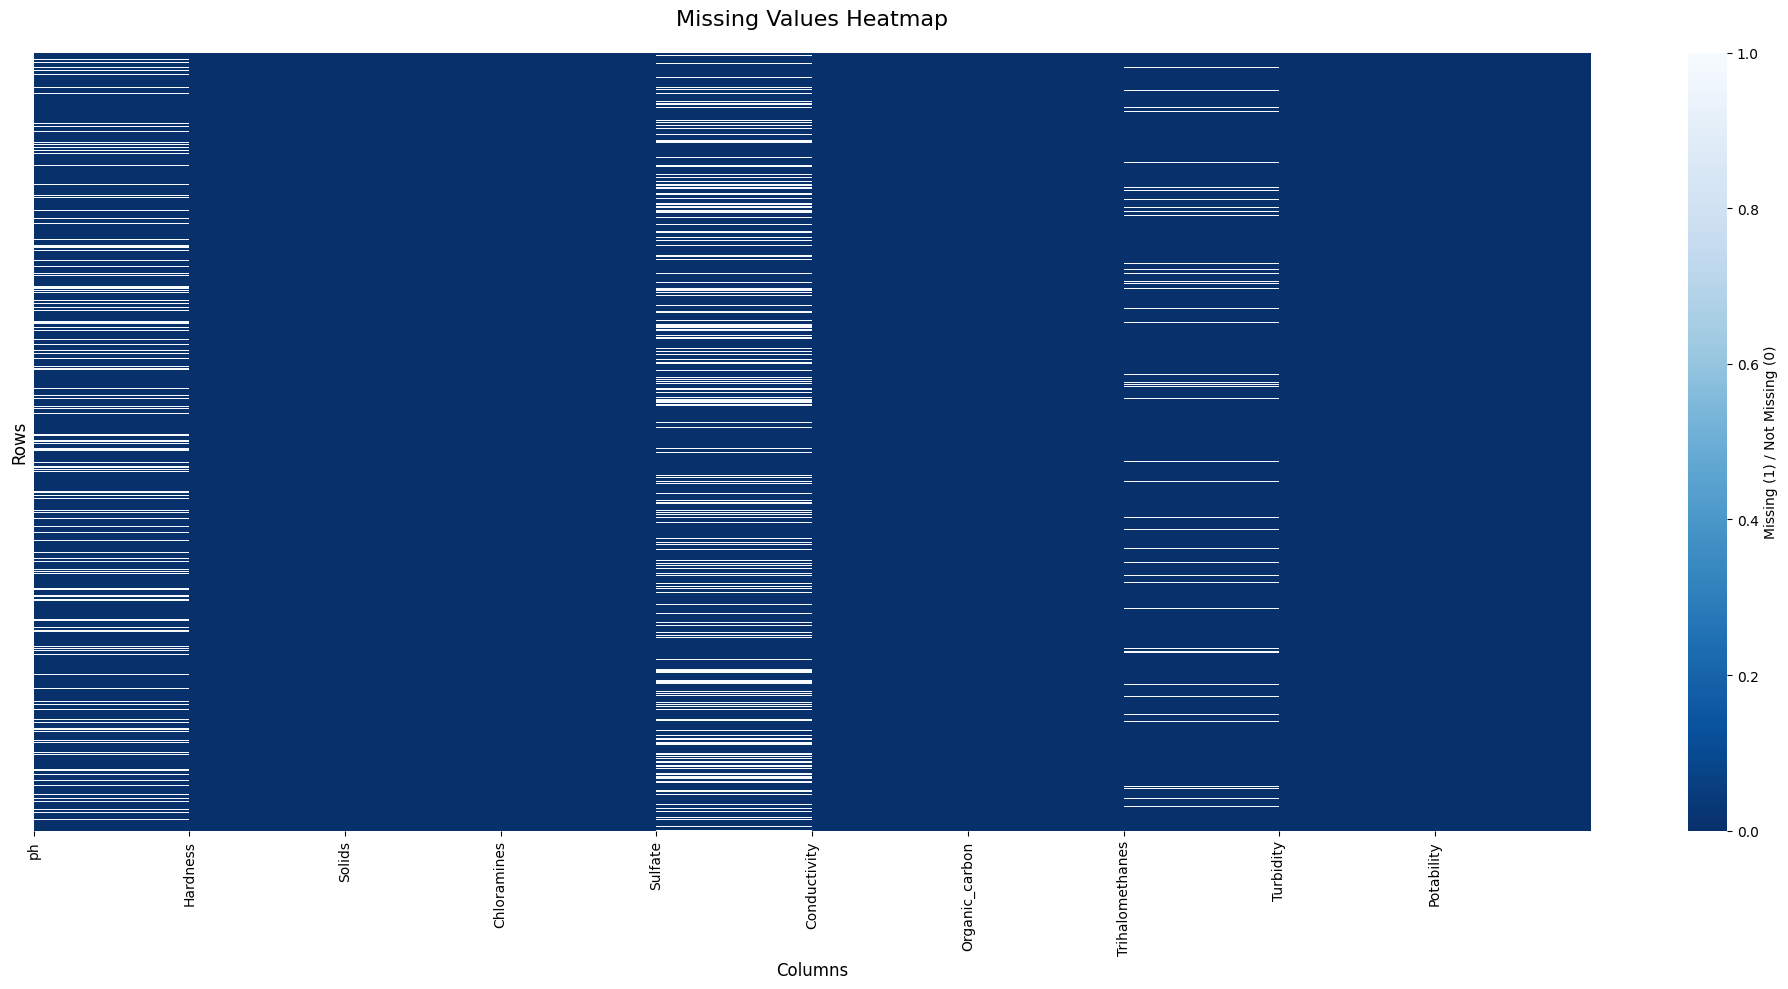

In [15]:
missing_matrix = df.isnull().astype(int)

plt.figure(figsize=(20, 10))

sns.heatmap(
    missing_matrix,
    cmap='Blues_r',
    cbar_kws={'label': 'Missing (1) / Not Missing (0)'},
    yticklabels=False
)


plt.title("Missing Values Heatmap", fontsize=16, pad=20)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.xticks(range(len(df.columns)), df.columns, rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

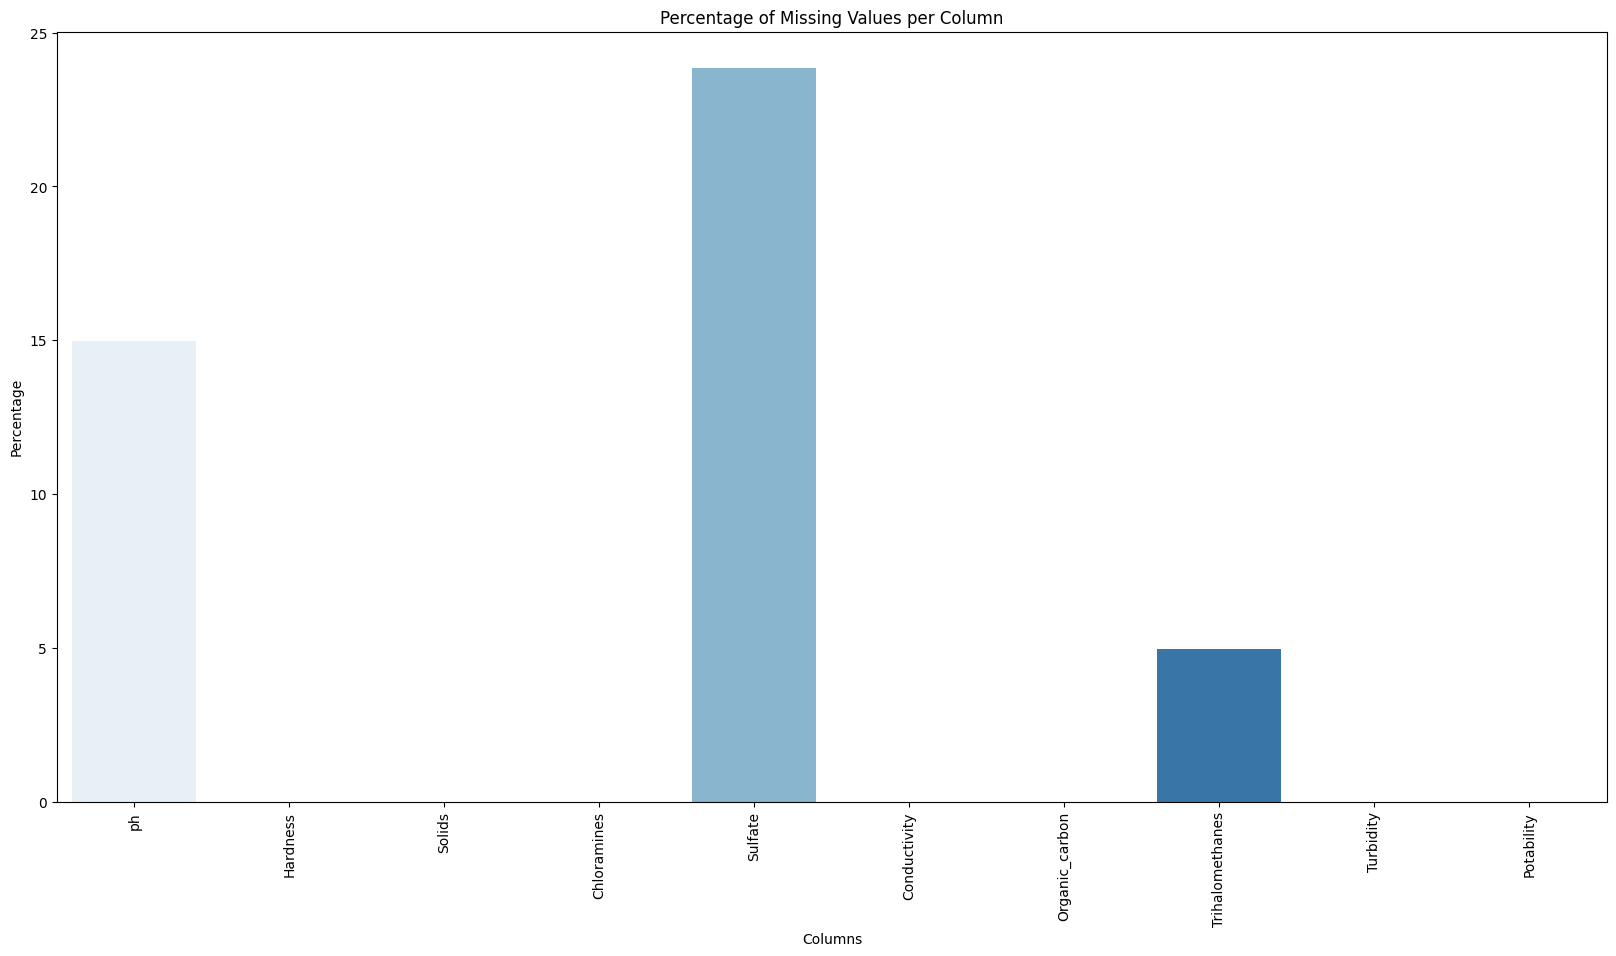

In [16]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(20, 10))
sns.barplot(x=missing_percentage.index, y=missing_percentage, hue=missing_percentage.index, palette='Blues', legend=False)
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.show()

The missing values are randomly distributed across the dataset, as confirmed by the heatmap visualization (For example, the first 500 rows do not have all the missing values for ph, nor are the missing values clustered in any particular subset of the data).

This random distribution indicates that the missingness is not due to a systematic issue.

Given the random distribution of missing values, we decided to impute the missing values rather than drop rows or columns. Dropping rows or columns could lead to a significant loss of data, especially since the missing values are spread across the dataset.

The missing values are present in both classes (Potability 1 and 0). Features like ph, Sulfate, and Trihalomethanes may have different distributions for potable vs. non-potable water.

By imputing missing values with the mean of each feature grouped by Potability, we preserve these class-specific patterns, leading to more accurate imputations.

In [17]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Detecting and Handling Outliers

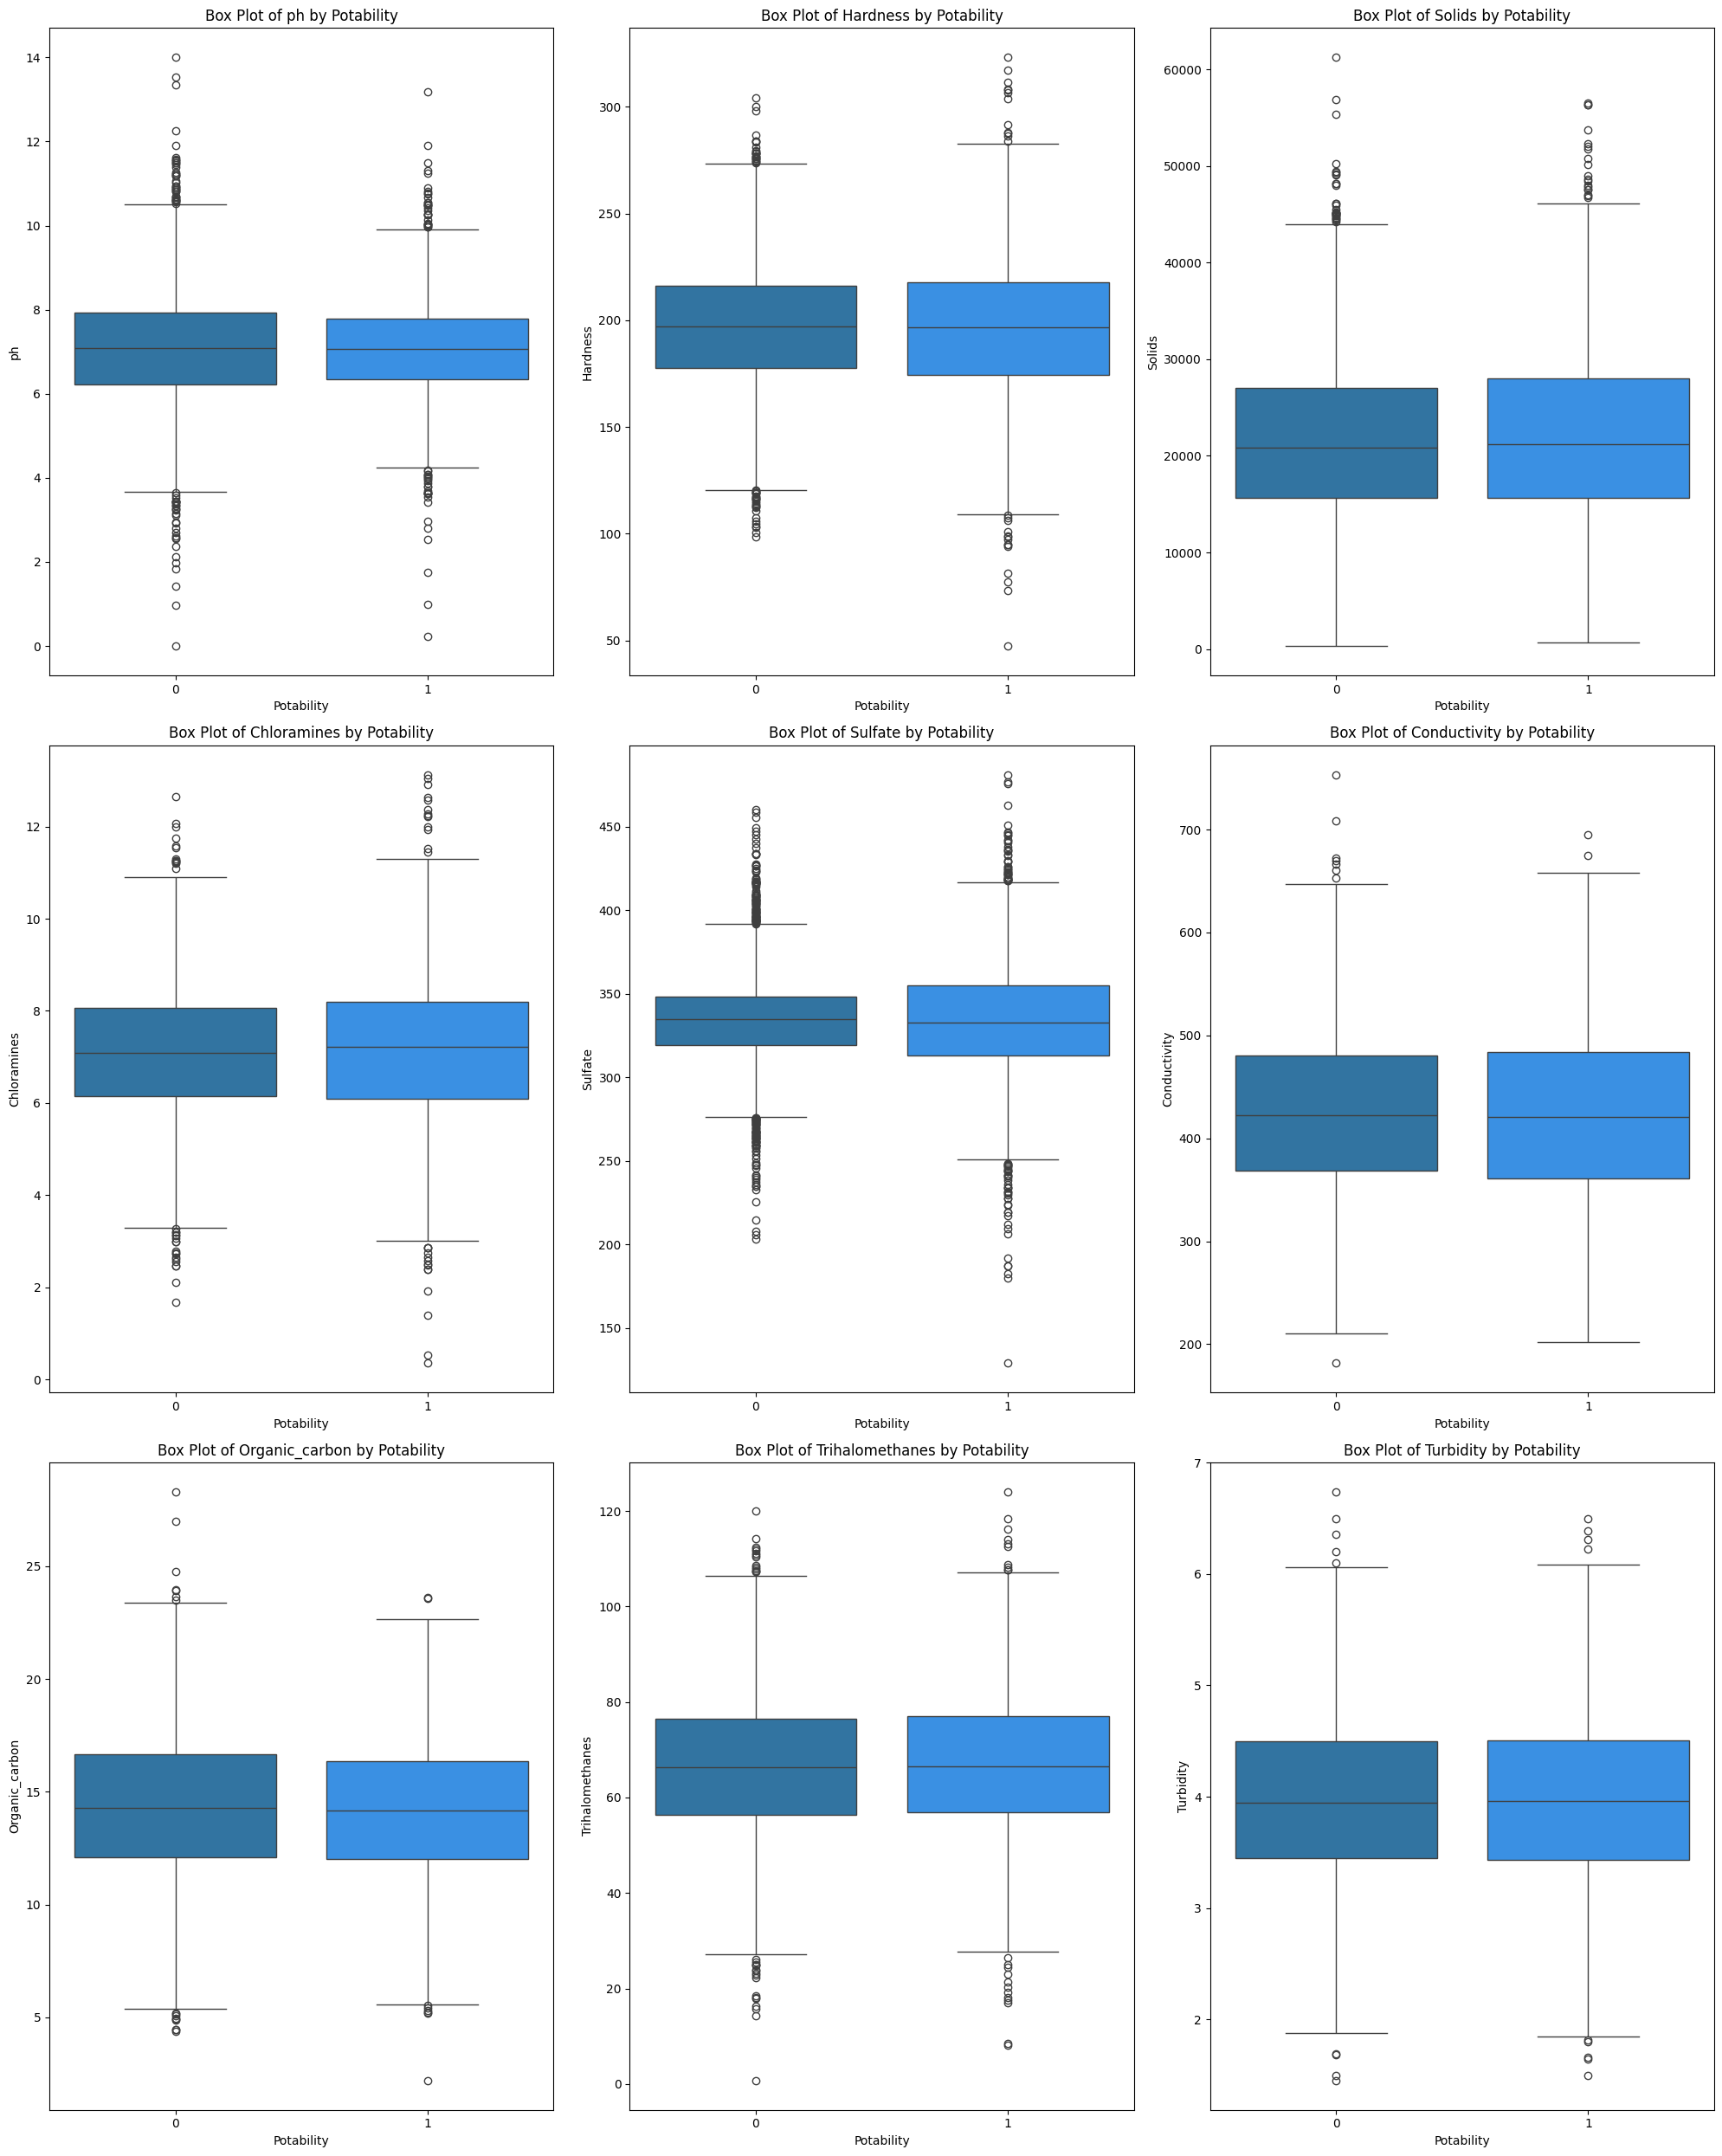

In [18]:
plt.figure(figsize=(20, 25))

for i, column in enumerate(df.drop(columns=['Potability']).columns, 1):
    plt.subplot(3, 3, i)

    sns.boxplot(x='Potability', y=column, data=df, hue='Potability', palette=['C0', 'dodgerblue'], legend=False)

    plt.title(f'Box Plot of {column} by Potability', fontsize=12)
    plt.xlabel('Potability', fontsize=10)
    plt.ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import zscore

def detect_outliers_zscore(column, threshold=3):
    z_scores = zscore(column)
    outliers = column[np.abs(z_scores) > threshold]
    return outliers

# Detect outliers for each feature and print the number of outliers
outlier_counts = {}
for column in df.drop(columns=['Potability']).columns:
    outliers = detect_outliers_zscore(df[column])
    outlier_counts[column] = len(outliers)
    print(f"Number of outliers in {column}: {len(outliers)}")

for column, count in outlier_counts.items():
    if count > 0:
        print(f"Outliers in {column}: {detect_outliers_zscore(df[column]).values}")

Number of outliers in ph: 28
Number of outliers in Hardness: 18
Number of outliers in Solids: 20
Number of outliers in Chloramines: 20
Number of outliers in Sulfate: 34
Number of outliers in Conductivity: 7
Number of outliers in Organic_carbon: 4
Number of outliers in Trihalomethanes: 18
Number of outliers in Turbidity: 9
Outliers in ph: [ 1.84453837  2.61203591 13.17540172  1.75703712  0.22749905 11.89807803
  0.98991221 12.24692807  2.56924356 11.53488049 14.         11.56876797
  2.5581028   2.53811577 11.90773983  2.37676808 13.54124024 13.34988856
  1.43178155 11.56316906  0.97557799 11.49670245  0.         11.49685889
 11.62114013  2.12853143  1.98538336 11.49101091]
Outliers in Hardness: [304.23591211 300.2924758   47.432       81.71089527  77.4595861
 307.70602409  94.09130748 323.124      311.38395647  73.49223369
 308.25383294 306.62748142  97.2809086  298.09867948 317.33812406
  94.90897713 303.70262673  94.81254522]
Outliers in Solids: [48621.56395154 52318.91729759 49074.7

Outliers were detected using the Z-score method. The Z-score measures how many standard deviations a data point is from the mean. Any data point with an absolute Z-score greater than a specified threshold (commonly 3) is considered an outlier.

In [20]:
# Create a mask to identify rows with outliers in any feature
outlier_mask = pd.Series(False, index=df.index)
for column in df.drop(columns=['Potability']).columns:
    z_scores = zscore(df[column])
    outlier_mask |= (np.abs(z_scores) > 3)

# Print the number of rows to be deleted
num_outliers = outlier_mask.sum()
print(f"Number of rows with outliers: {num_outliers}")

# Delete rows with outliers
df_cleaned = df[~outlier_mask]

# Print the shape of the cleaned dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

df = df_cleaned

Number of rows with outliers: 148
Original dataset shape: (3276, 10)
Cleaned dataset shape: (3128, 10)


### Analyzing the Distribution of Features

Understanding the distribution of each feature is crucial for identifying skewness, normality, or other patterns that might affect the model.

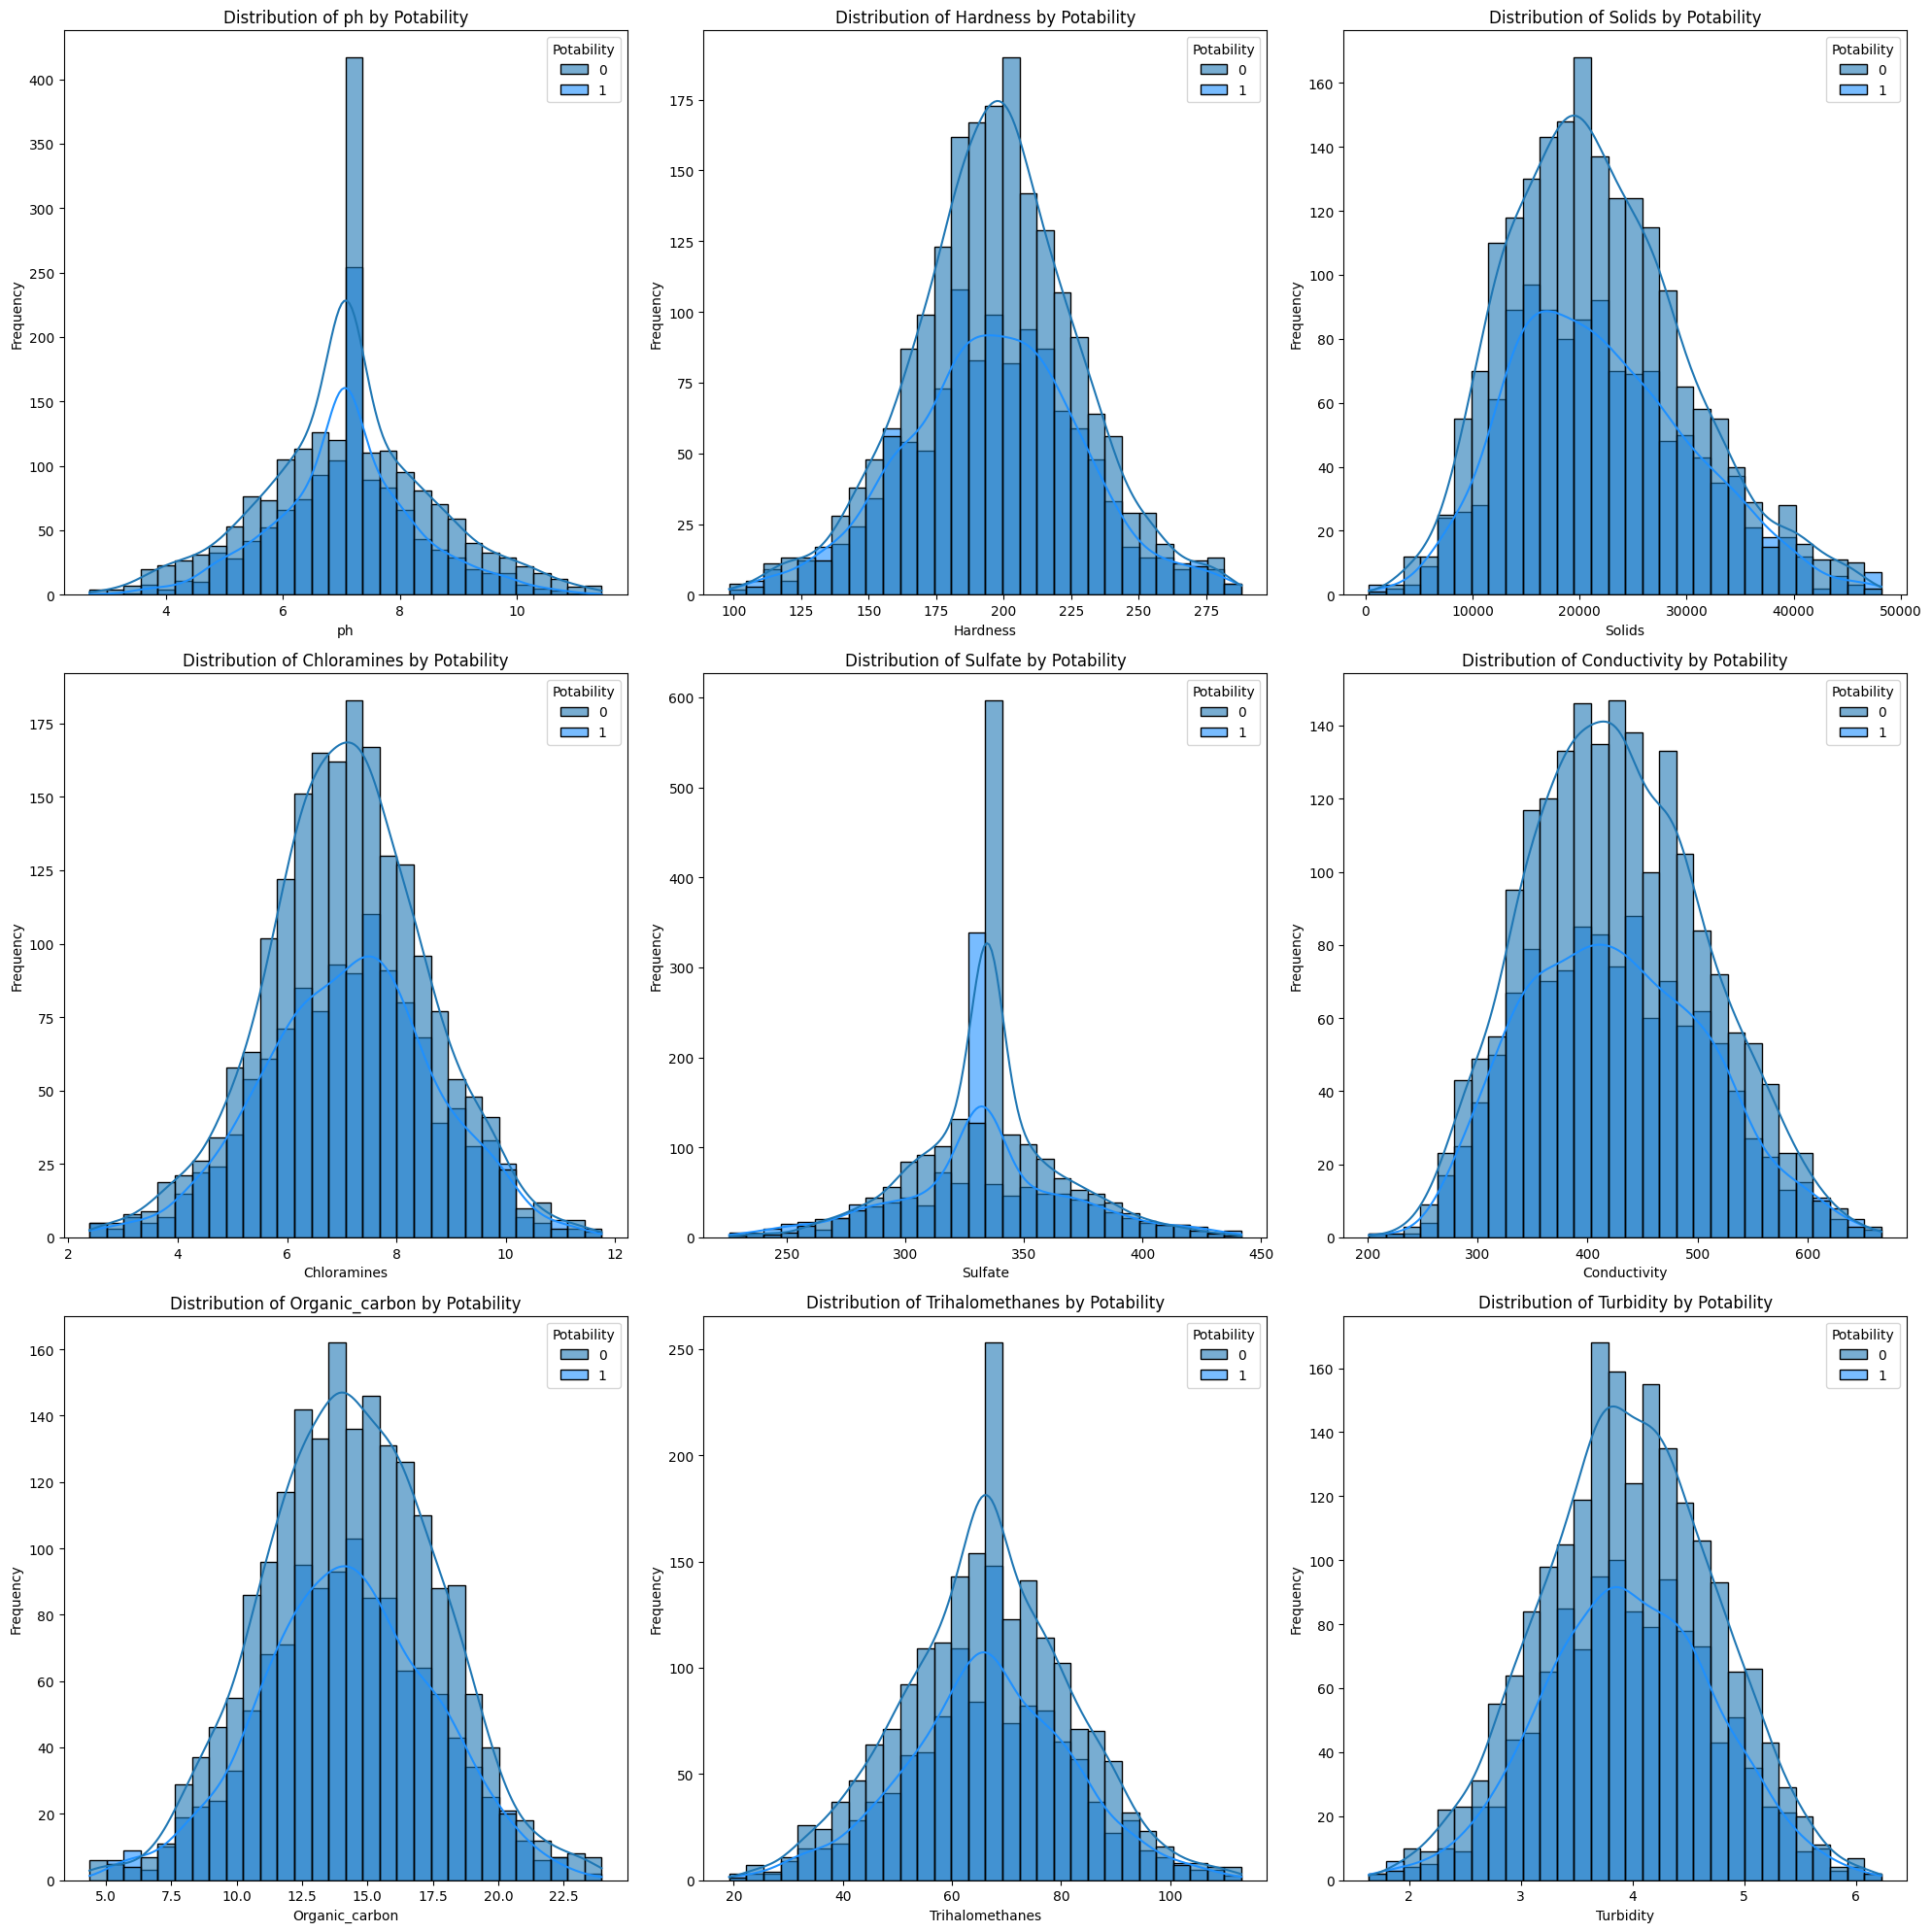

Skewness of Features:
ph                 0.073847
Hardness          -0.048818
Solids             0.470682
Chloramines       -0.062213
Sulfate            0.079781
Conductivity       0.224300
Organic_carbon    -0.013610
Trihalomethanes   -0.024787
Turbidity         -0.030712
dtype: float64


In [21]:
features = df.drop(columns=['Potability'])
target = df['Potability']

plt.figure(figsize=(20, 20))
for i, column in enumerate(features.columns, 1):
    plt.subplot(3, 3, i)

    sns.histplot(data=df, x=column, hue='Potability', kde=True, bins=30, palette=['C0', 'dodgerblue'], alpha=0.6)

    plt.title(f'Distribution of {column} by Potability', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

# Check skewness for each feature
skewness = features.skew()
print("Skewness of Features:")
print(skewness)

Features with skewness close to 0 (e.g., ph, Hardness, Chloramines) are approximately symmetric.

Features with moderate skewness (e.g., Solids (0.47), Conductivity (0.22)) may benefit from transformations to reduce skewness

The log transformation is effective for reducing positive skewness. It compresses large values and expands smaller values, making the distribution more symmetric.

In [22]:
solids_log = np.log1p(df['Solids'])

conductivity_log = np.log1p(df['Conductivity'])

print("Skewness after Log Transformation:")
print("Solids:", solids_log.skew())
print("Conductivity:", conductivity_log.skew())

Skewness after Log Transformation:
Solids: -1.1808400255469096
Conductivity: -0.2141930503076489


The log transformation made the skewness worse, resulting in negative skewness for both features.

This indicates that the log transformation was too aggressive for these features.

Since the log transformation overcorrected, we try the square root transformation.

In [23]:
solids_sqrt = np.sqrt(df['Solids'])

conductivity_sqrt = np.sqrt(df['Conductivity'])

print("Skewness after Square Root Transformation:")
print("Solids:", solids_sqrt.skew())
print("Conductivity:", conductivity_sqrt.skew())

Skewness after Square Root Transformation:
Solids: -0.09675831128863627
Conductivity: 0.008303227062463317


The square root transformation effectively reduced the skewness without overcorrecting.

The distributions are now more symmetric.

Once the best transformation is identified, we apply it to the main dataframe

In [24]:
df['Solids'] = solids_sqrt

# Apply square root transformation to Conductivity in the main dataframe
df['Conductivity'] = conductivity_sqrt

# Recheck skewness in the main dataframe
print("Skewness in Main Dataframe after Square Root Transformation:")
print(df[['Solids', 'Conductivity']].skew())

Skewness in Main Dataframe after Square Root Transformation:
Solids         -0.096758
Conductivity    0.008303
dtype: float64


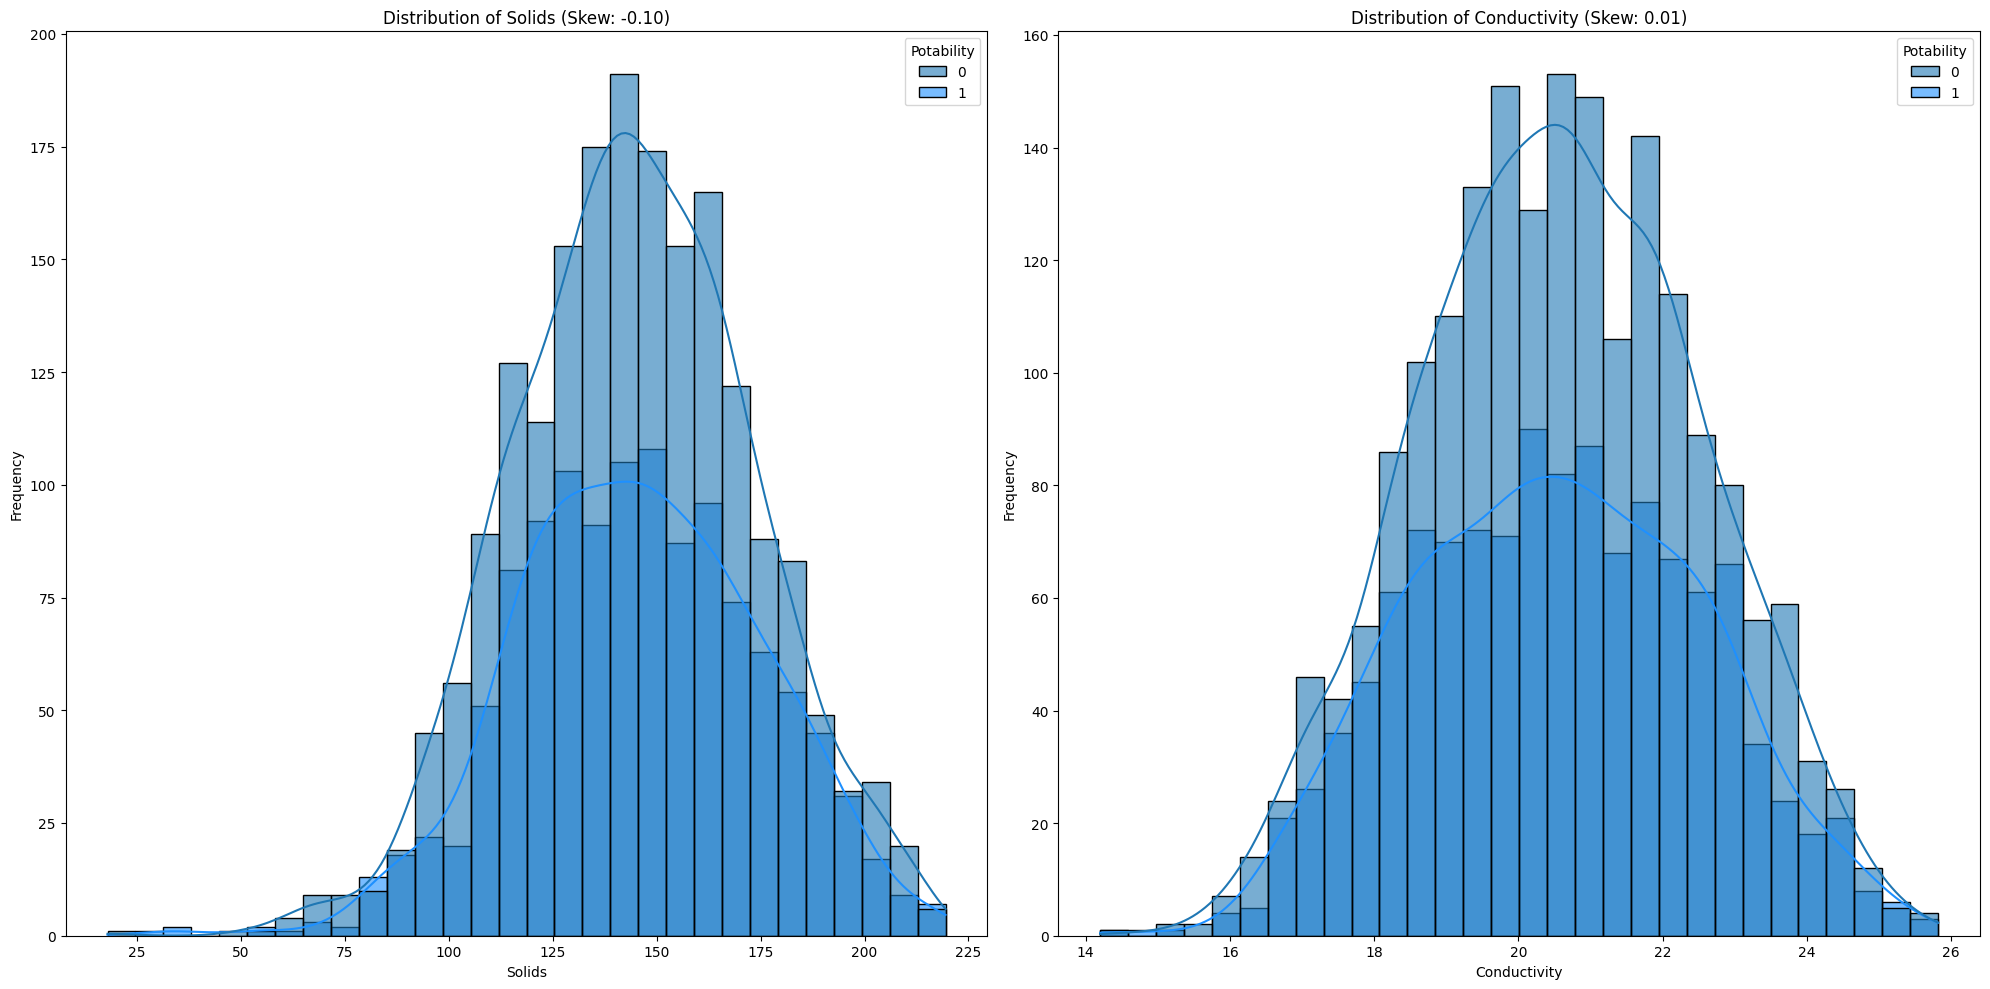

In [25]:
plt.figure(figsize=(20, 10))

# Solids after log transformation
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Solids', hue='Potability', kde=True, bins=30, palette=['C0', 'dodgerblue'], alpha=0.6)
plt.title(f'Distribution of Solids (Skew: {df["Solids"].skew():.2f})', fontsize=12)
plt.xlabel('Solids', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Conductivity after log transformation
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Conductivity', hue='Potability', kde=True, bins=30, palette=['C0', 'dodgerblue'], alpha=0.6)
plt.title(f'Distribution of Conductivity (Skew: {df["Conductivity"].skew():.2f})', fontsize=12)
plt.xlabel('Conductivity', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

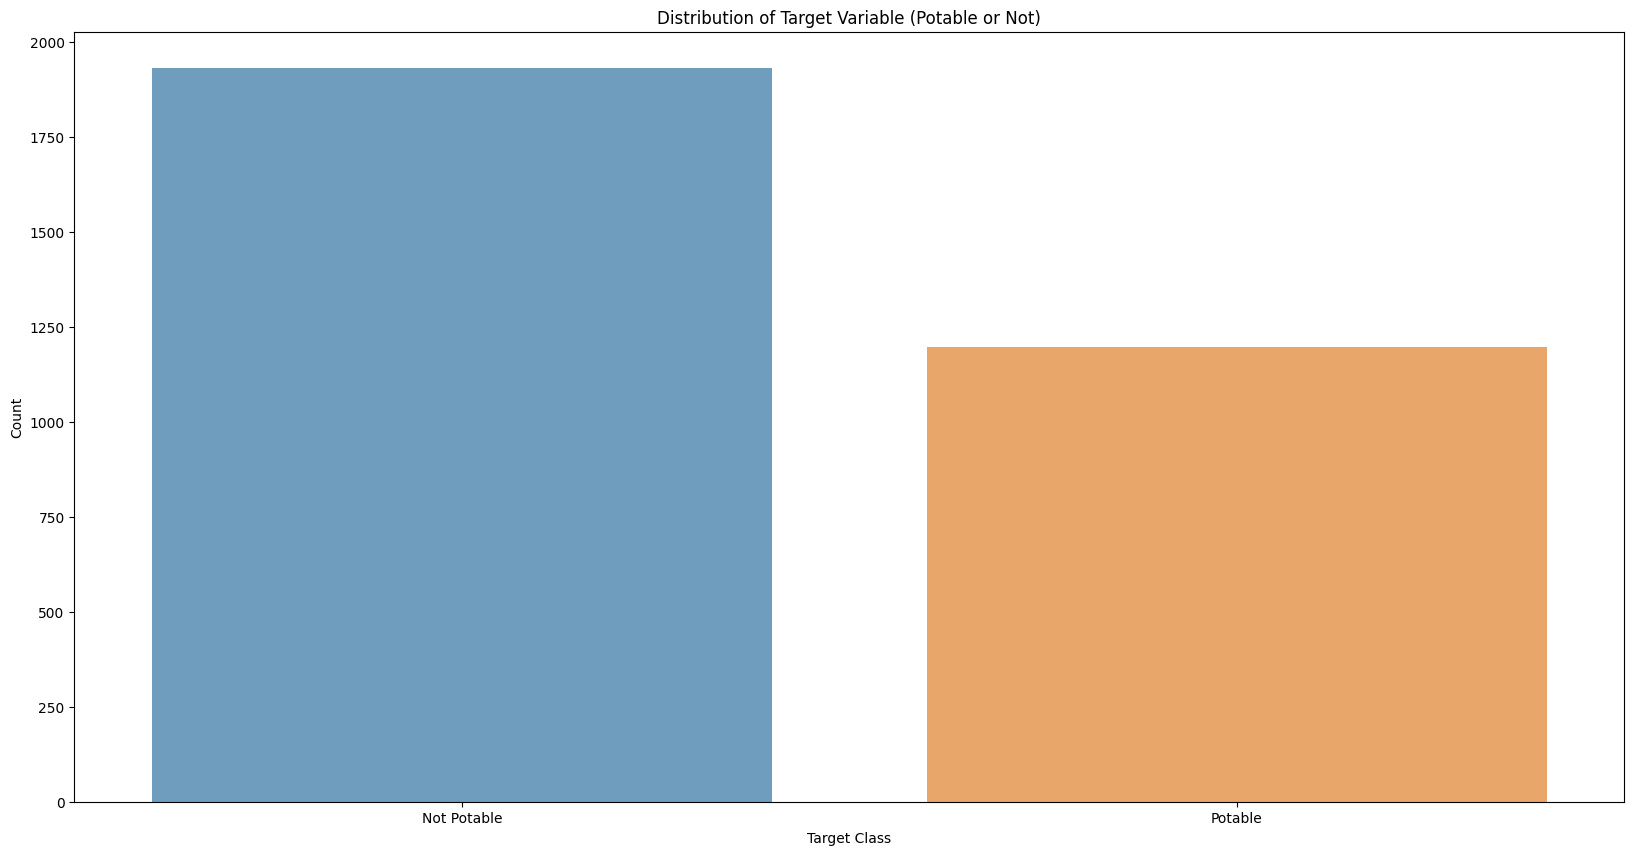

Target Variable Distribution:
Potability
0    1930
1    1198
Name: count, dtype: int64


In [26]:
target_counts = df['Potability'].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette=['C0', 'C1'], legend=False, alpha=0.7)
plt.title('Distribution of Target Variable (Potable or Not)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Potable', 'Potable'])
plt.show()

print("Target Variable Distribution:")
print(target_counts)

The target variable is imbalanced:

Non-potable (0.0): (majority class)

Potable (1.0): (minority class)

The ratio of non-potable to potable is approximately 1.6, which is a mild imbalance.

### Relation of features

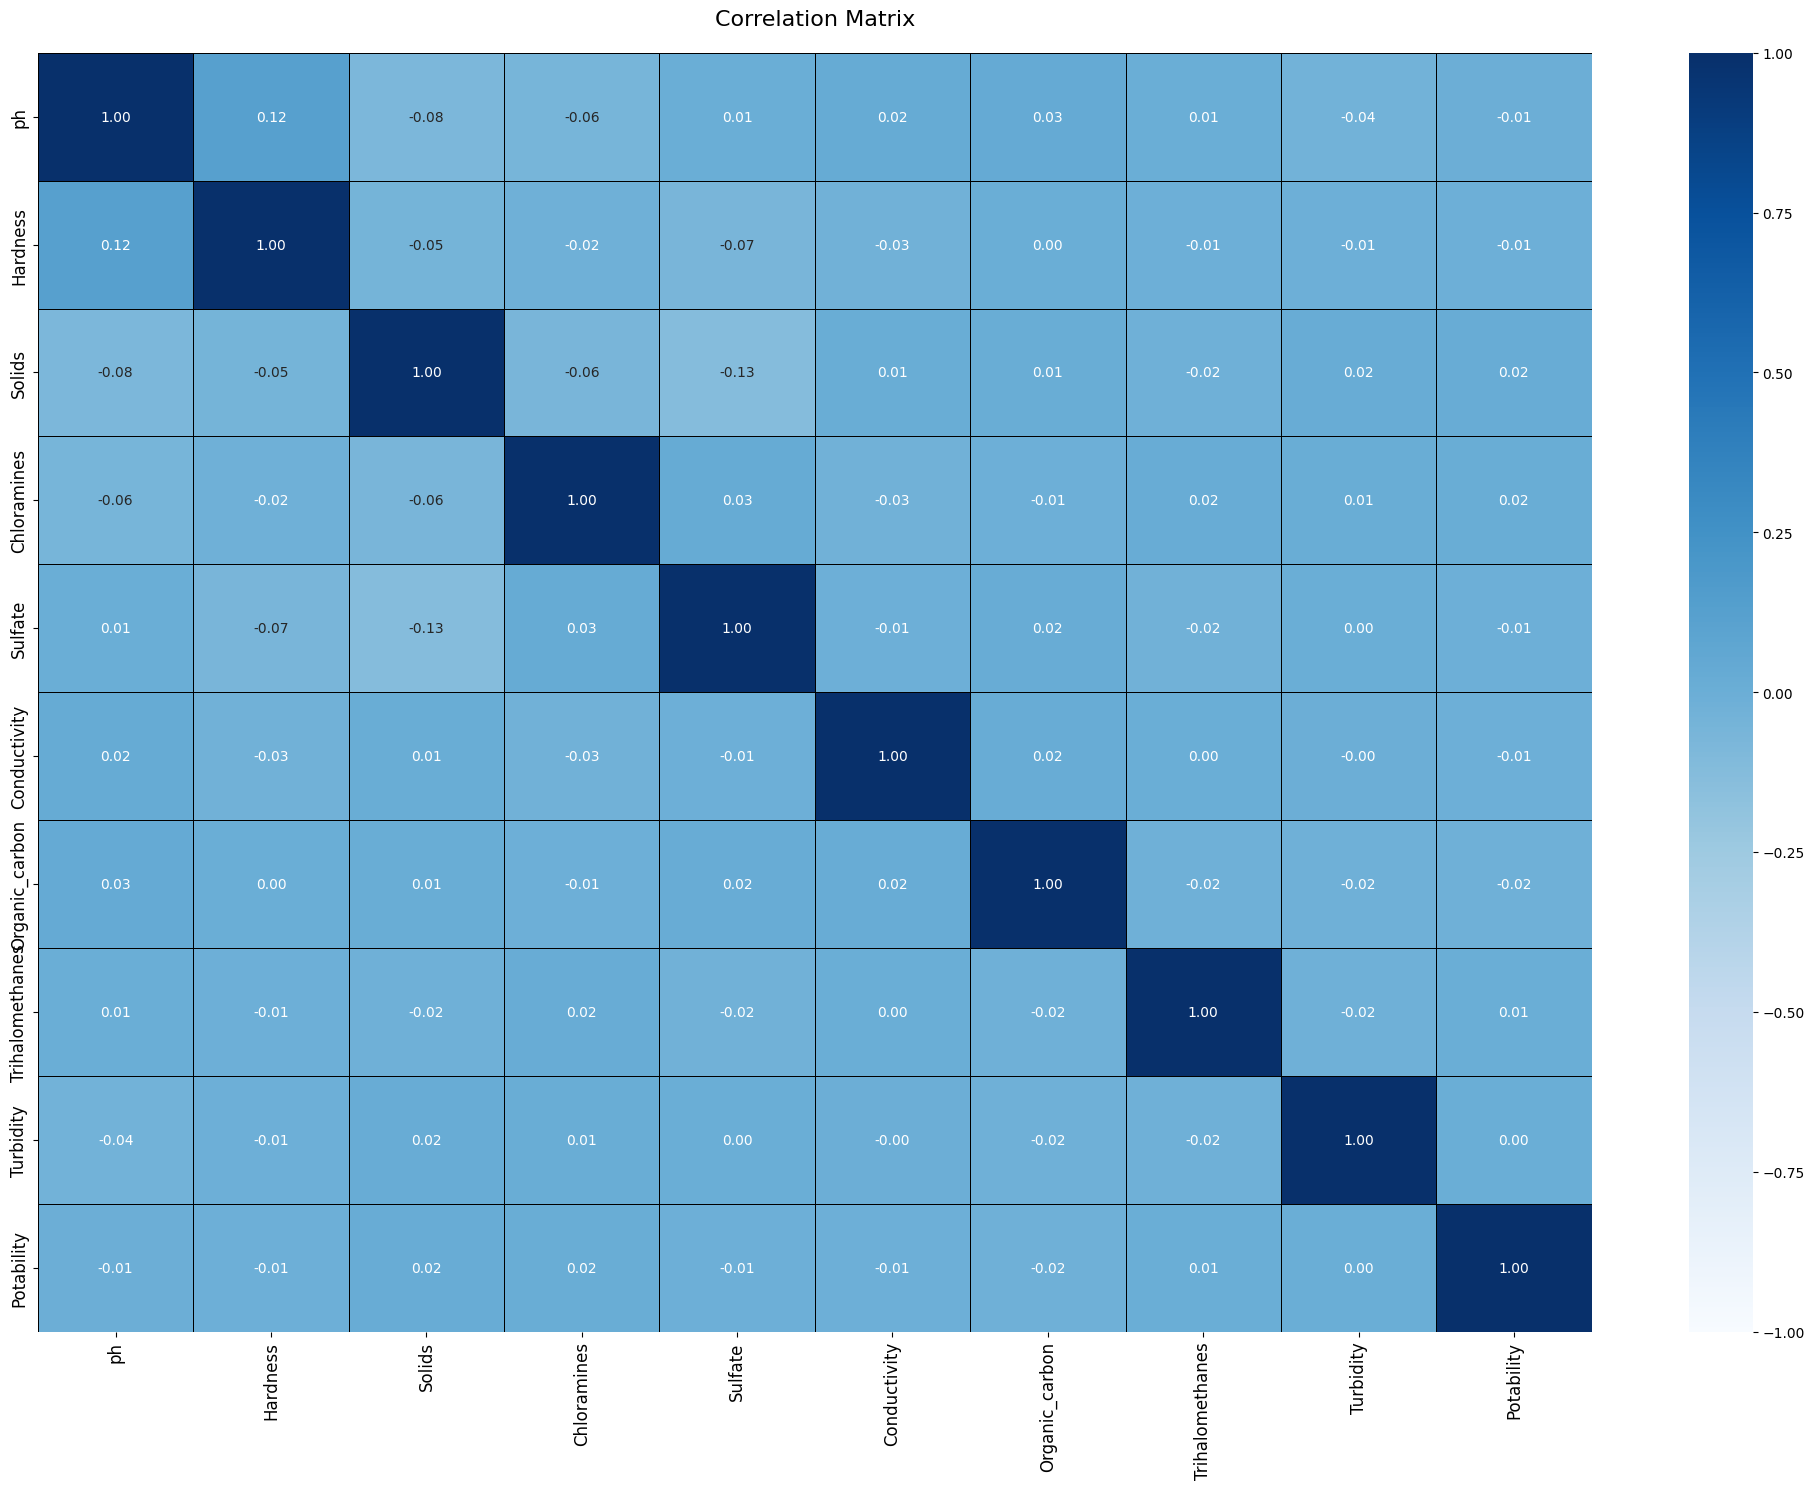

In [27]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='Blues',
    vmin=-1,
    vmax=1,
    linewidths=0.7,
    linecolor='black'
)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

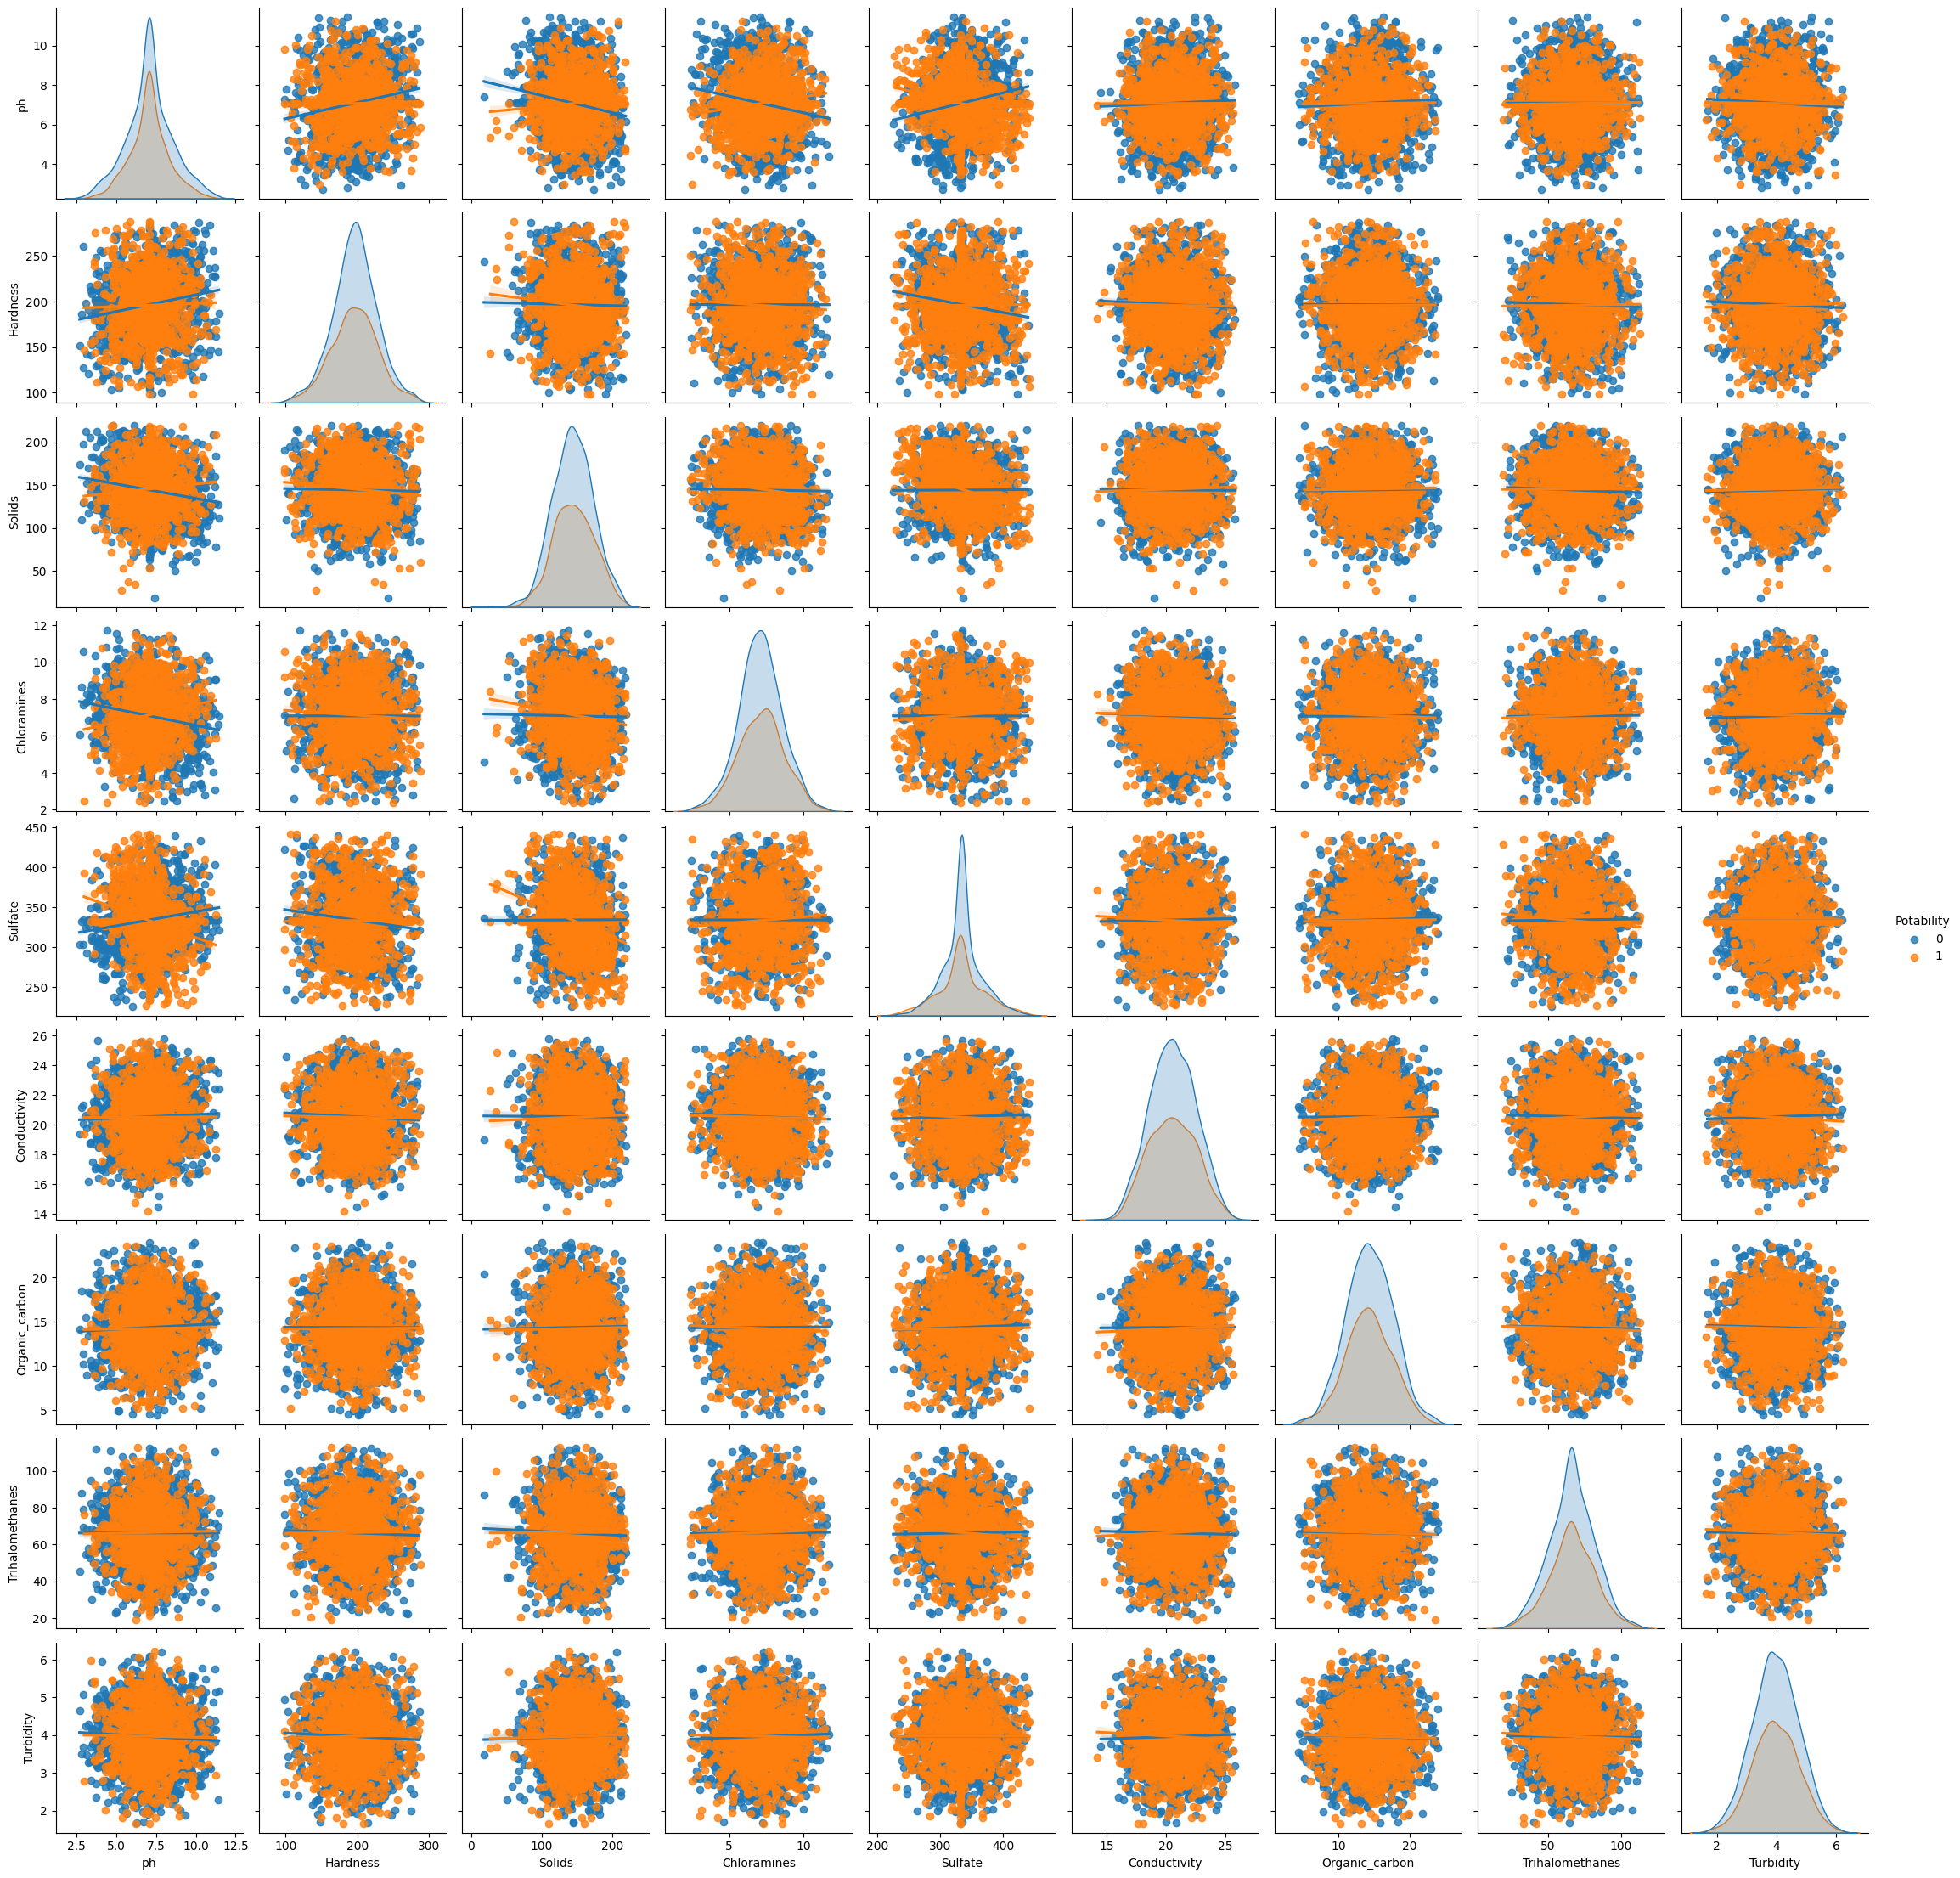

In [28]:
sns.pairplot(df, hue='Potability', kind='reg')

The features are mostly independent of each other. Since there are no strong correlations, there is no multicollinearity .

### Feature Scaling and Final Data Preparation

Imbalance can lead to biased model performance, where the model may prioritize the majority class and perform poorly on the minority class. For example, a model might achieve high accuracy by simply predicting the majority class, but this would be useless for predicting the minority class.

SMOTE (Synthetic Minority Oversampling Technique) is a popular method for addressing class imbalance

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.drop(['Potability'], axis=1)
y = df['Potability']

# training (80%) and temporary test+validation (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Apply SMOTE to the training set only
samp = SMOTE(random_state=42)
X_train, y_train = samp.fit_resample(X_train, y_train)

# Scale the features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)

# Print shapes to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Verify class distribution
print("Training class distribution:", np.unique(y_train, return_counts=True))
print("Validation class distribution:", np.unique(y_val, return_counts=True))
print("Test class distribution:", np.unique(y_test, return_counts=True))

Training set shape: (3088, 9) (3088,)
Validation set shape: (313, 9) (313,)
Test set shape: (313, 9) (313,)
Training class distribution: (array([0, 1]), array([1544, 1544]))
Validation class distribution: (array([0, 1]), array([193, 120]))
Test class distribution: (array([0, 1]), array([193, 120]))


## **Model Training and Evaluation**

In this phase, we will:

Train multiple models to evaluate their performance.

Use k-fold cross-validation on the training set to assess model stability and generalization.

valuate models on the validation set to measure their performance on unseen data.

Report results on both the training set and validation set to detect underfitting, overfitting, and the bias-variance tradeoff.

Select the best-performing models and proceed to hyperparameter tuning.

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(random_state=42, max_iter=1000)

cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

log_reg.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)

# Evaluate the model on the validation set
y_val_pred = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Generate confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Print results
print("Cross-validation scores for Logistic Regression:", cv_scores)
print("Mean cross-validation accuracy for Logistic Regression is:", cv_scores.mean())
print("\nTraining Set Accuracy:", train_accuracy)
print("\nClassification Report for Logistic Regression on Training Set:")
print(train_classification_rep)
print("\nValidation Set Accuracy:", val_accuracy)
print("\nClassification Report for Logistic Regression on Validation Set:")
print(val_classification_rep)

Cross-validation scores for Logistic Regression: [0.48381877 0.48381877 0.48220065 0.49756888 0.49432739]
Mean cross-validation accuracy for Logistic Regression: 0.48834689199750336

Training Set Accuracy: 0.5226683937823834

Classification Report for Logistic Regression on Training Set:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1544
           1       0.52      0.52      0.52      1544

    accuracy                           0.52      3088
   macro avg       0.52      0.52      0.52      3088
weighted avg       0.52      0.52      0.52      3088


Validation Set Accuracy: 0.5303514376996805

Classification Report for Logistic Regression on Validation Set:
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       193
           1       0.42      0.57      0.48       120

    accuracy                           0.53       313
   macro avg       0.54      0.54      0.53       313
w

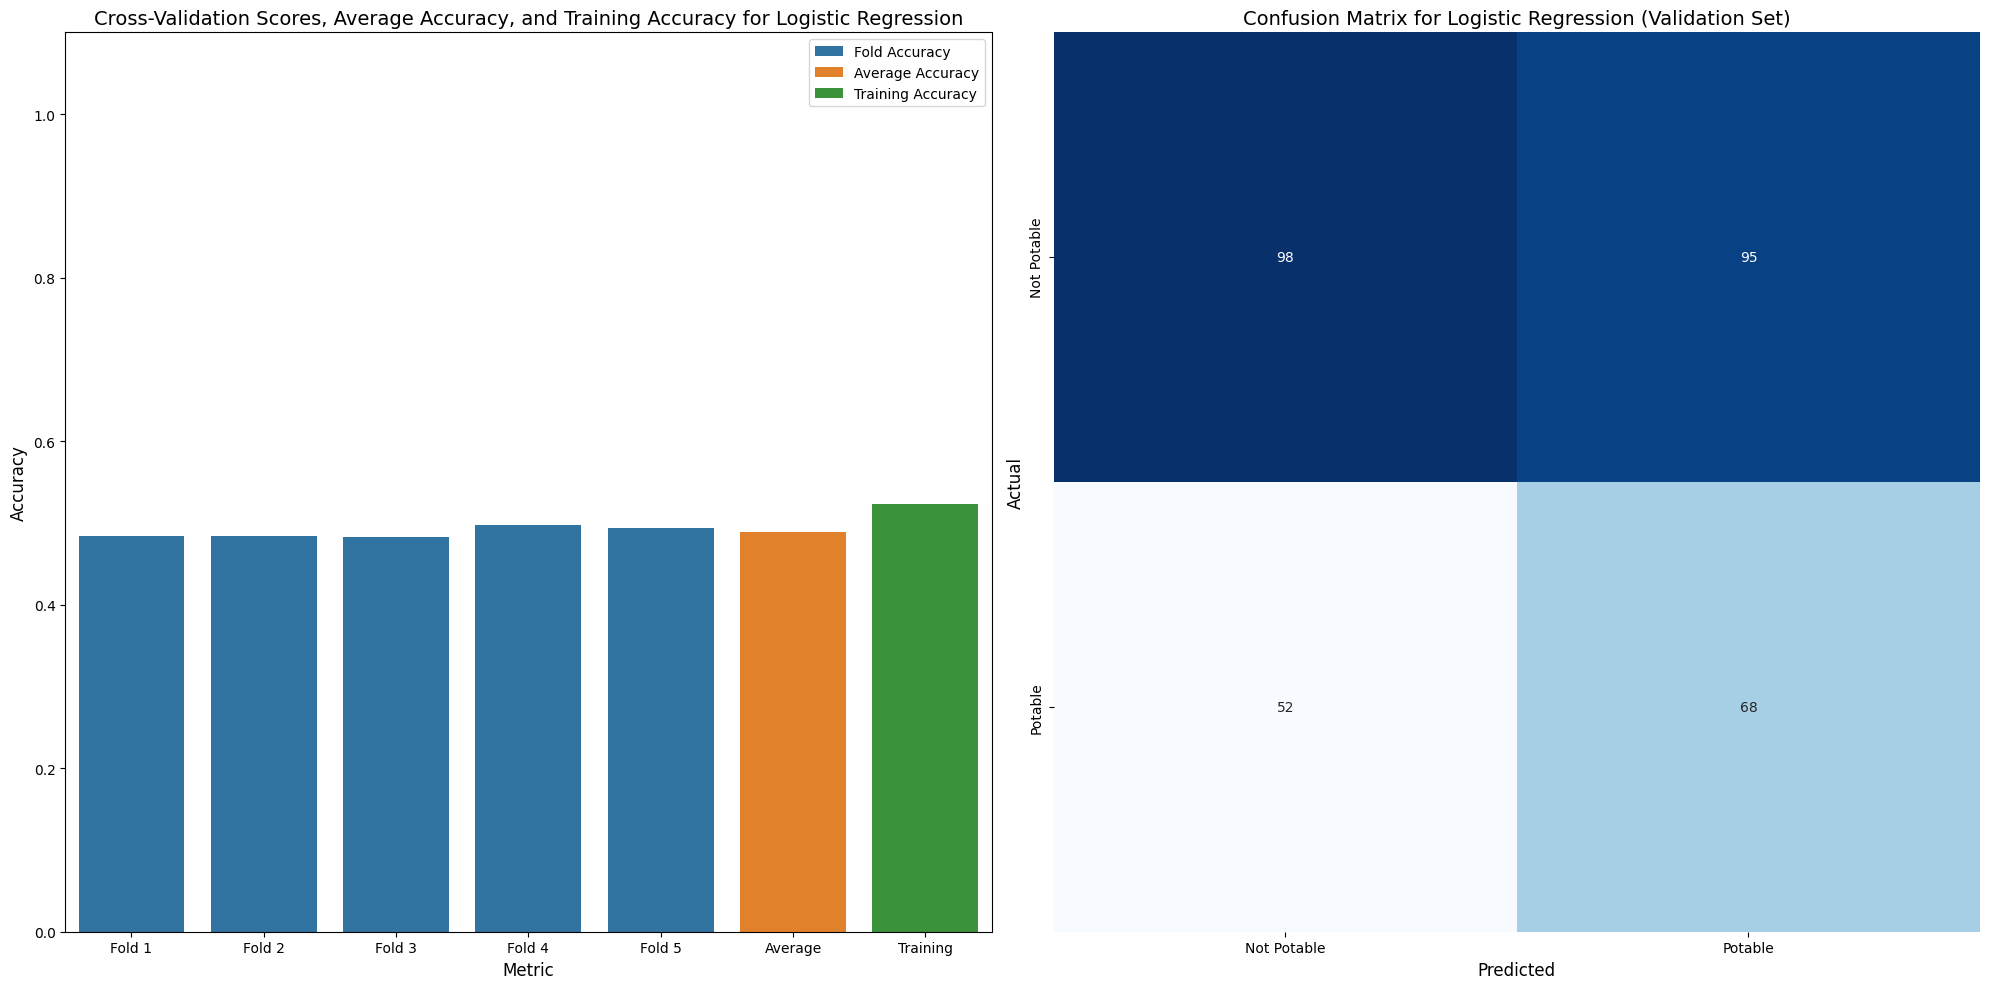

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot cross-validation scores, average accuracy, and training accuracy
sns.barplot(x=[f"Fold {i+1}" for i in range(5)], y=cv_scores, color='C0', label='Fold Accuracy', ax=ax1)
sns.barplot(x=["Average"], y=[cv_scores.mean()], color='C1', label='Average Accuracy', ax=ax1)
sns.barplot(x=["Training"], y=[train_accuracy], color='C2', label='Training Accuracy', ax=ax1)

ax1.set_title("Cross-Validation Scores, Average Accuracy, and Training Accuracy for Logistic Regression", fontsize=14)
ax1.set_xlabel("Metric", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper right')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'], ax=ax2)
ax2.set_title("Confusion Matrix for Logistic Regression (Validation Set)", fontsize=14)
ax2.set_xlabel("Predicted", fontsize=12)
ax2.set_ylabel("Actual", fontsize=12)

plt.tight_layout()
plt.show()

### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

knn.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)

# Evaluate the model on the validation set
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Generate confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Print results
print("Cross-validation scores for KNN:", cv_scores)
print("Mean cross-validation accuracy for KNN:", cv_scores.mean())
print("\nTraining Set Accuracy:", train_accuracy)
print("\nClassification Report for KNN on Training Set:")
print(train_classification_rep)
print("\nValidation Set Accuracy:", val_accuracy)
print("\nClassification Report for KNN on Validation Set:")
print(val_classification_rep)

Cross-validation scores for KNN: [0.66666667 0.63106796 0.62621359 0.70178282 0.70988655]
Mean cross-validation accuracy for KNN: 0.6671235175947927

Training Set Accuracy: 0.8018134715025906

Classification Report for KNN on Training Set:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1544
           1       0.77      0.85      0.81      1544

    accuracy                           0.80      3088
   macro avg       0.81      0.80      0.80      3088
weighted avg       0.81      0.80      0.80      3088


Validation Set Accuracy: 0.5878594249201278

Classification Report for KNN on Validation Set:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       193
           1       0.47      0.53      0.50       120

    accuracy                           0.59       313
   macro avg       0.57      0.58      0.57       313
weighted avg       0.60      0.59      0.59       313



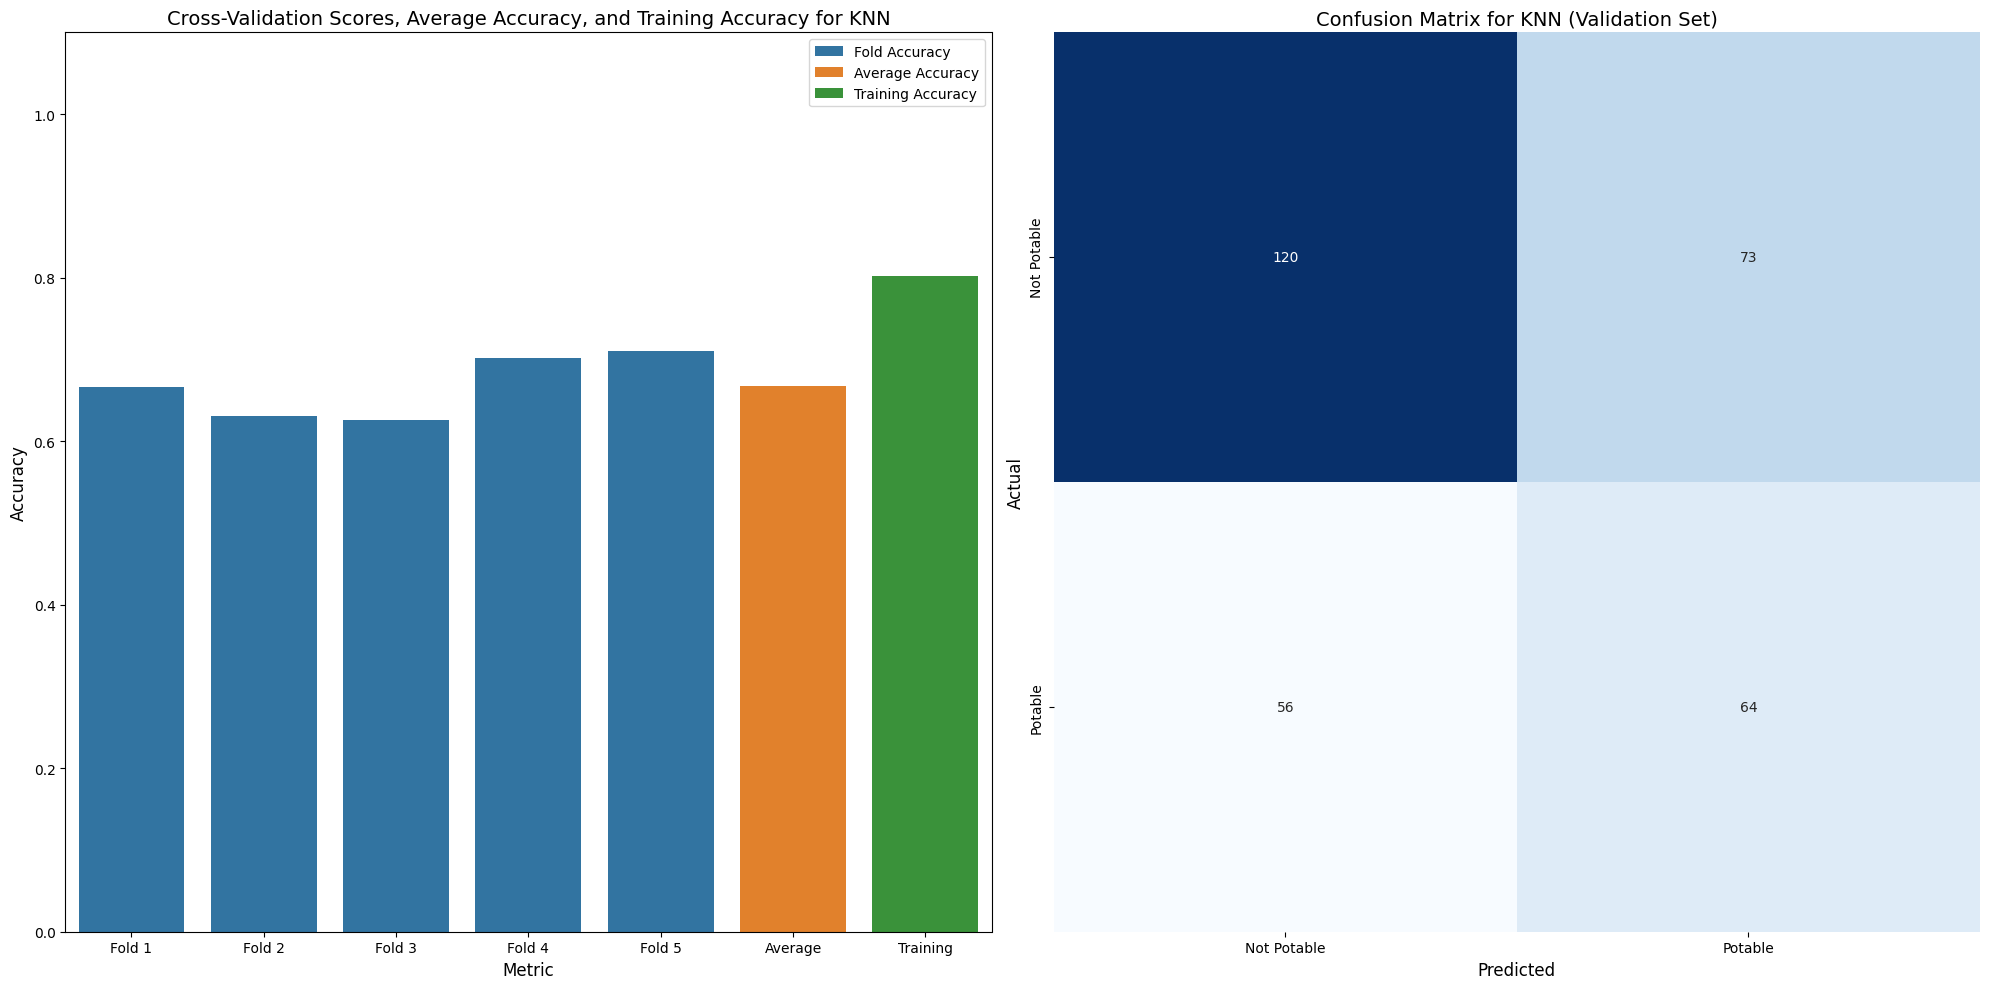

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot cross-validation scores, average accuracy, and training accuracy
sns.barplot(x=[f"Fold {i+1}" for i in range(5)], y=cv_scores, color='C0', label='Fold Accuracy', ax=ax1)
sns.barplot(x=["Average"], y=[cv_scores.mean()], color='C1', label='Average Accuracy', ax=ax1)
sns.barplot(x=["Training"], y=[train_accuracy], color='C2', label='Training Accuracy', ax=ax1)

ax1.set_title("Cross-Validation Scores, Average Accuracy, and Training Accuracy for KNN", fontsize=14)
ax1.set_xlabel("Metric", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper right')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'], ax=ax2)
ax2.set_title("Confusion Matrix for KNN (Validation Set)", fontsize=14)
ax2.set_xlabel("Predicted", fontsize=12)
ax2.set_ylabel("Actual", fontsize=12)

plt.tight_layout()
plt.show()

### SVM

In [35]:
from sklearn.svm import SVC

svm = SVC(random_state=42)

cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

svm.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the validation set
y_val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Print results
print("Cross-validation scores for SVM:", cv_scores)
print("Mean cross-validation accuracy for SVM:", cv_scores.mean())
print("\nTraining Set Accuracy:", train_accuracy)
print("\nClassification Report for SVM on Training Set:")
print(train_classification_rep)
print("\nValidation Set Accuracy:", val_accuracy)
print("\nClassification Report for SVM on Validation Set:")
print(val_classification_rep)

Cross-validation scores for SVM: [0.6618123  0.64724919 0.66019417 0.68719611 0.71312804]
Mean cross-validation accuracy for SVM: 0.6739159625078022

Training Set Accuracy: 0.7619818652849741

Classification Report for SVM on Training Set:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1544
           1       0.75      0.79      0.77      1544

    accuracy                           0.76      3088
   macro avg       0.76      0.76      0.76      3088
weighted avg       0.76      0.76      0.76      3088


Validation Set Accuracy: 0.6421725239616614

Classification Report for SVM on Validation Set:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       193
           1       0.53      0.58      0.56       120

    accuracy                           0.64       313
   macro avg       0.63      0.63      0.63       313
weighted avg       0.65      0.64      0.64       313



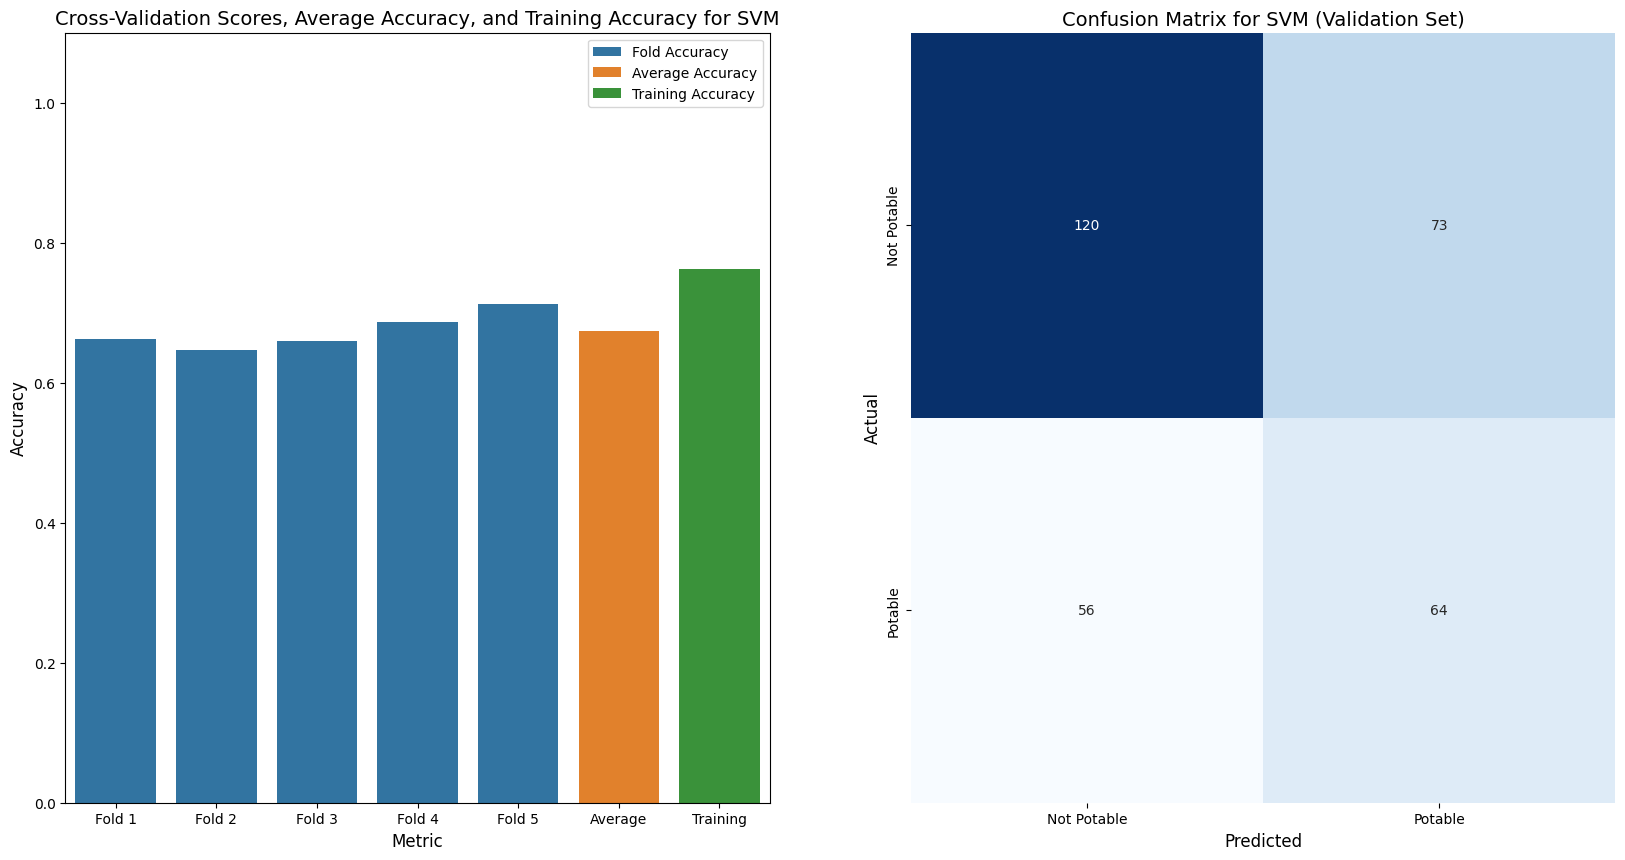

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot cross-validation scores, average accuracy, and training accuracy
sns.barplot(x=[f"Fold {i+1}" for i in range(5)], y=cv_scores, color='C0', label='Fold Accuracy', ax=ax1)
sns.barplot(x=["Average"], y=[cv_scores.mean()], color='C1', label='Average Accuracy', ax=ax1)
sns.barplot(x=["Training"], y=[train_accuracy], color='C2', label='Training Accuracy', ax=ax1)

ax1.set_title("Cross-Validation Scores, Average Accuracy, and Training Accuracy for SVM", fontsize=14)
ax1.set_xlabel("Metric", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper right')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'], ax=ax2)
ax2.set_title("Confusion Matrix for SVM (Validation Set)", fontsize=14)
ax2.set_xlabel("Predicted", fontsize=12)
ax2.set_ylabel("Actual", fontsize=12)

# plt.tight_layout()
plt.show()

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

rf.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)

# Evaluate the model on the validation set
y_val_pred = rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Print results
print("Cross-validation scores for Random Forest:", cv_scores)
print("Mean cross-validation accuracy for Random Forest:", cv_scores.mean())
print("\nTraining Set Accuracy:", train_accuracy)
print("\nClassification Report for Random Forest on Training Set:")
print(train_classification_rep)
print("\nValidation Set Accuracy:", val_accuracy)
print("\nClassification Report for Random Forest on Validation Set:")
print(val_classification_rep)

Cross-validation scores for Random Forest: [0.82524272 0.80582524 0.80744337 0.82171799 0.85089141]
Mean cross-validation accuracy for Random Forest: 0.8222241454369982

Training Set Accuracy: 1.0

Classification Report for Random Forest on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1544
           1       1.00      1.00      1.00      1544

    accuracy                           1.00      3088
   macro avg       1.00      1.00      1.00      3088
weighted avg       1.00      1.00      1.00      3088


Validation Set Accuracy: 0.7795527156549521

Classification Report for Random Forest on Validation Set:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       193
           1       0.72      0.69      0.71       120

    accuracy                           0.78       313
   macro avg       0.77      0.76      0.76       313
weighted avg       0.78      0.78      0.

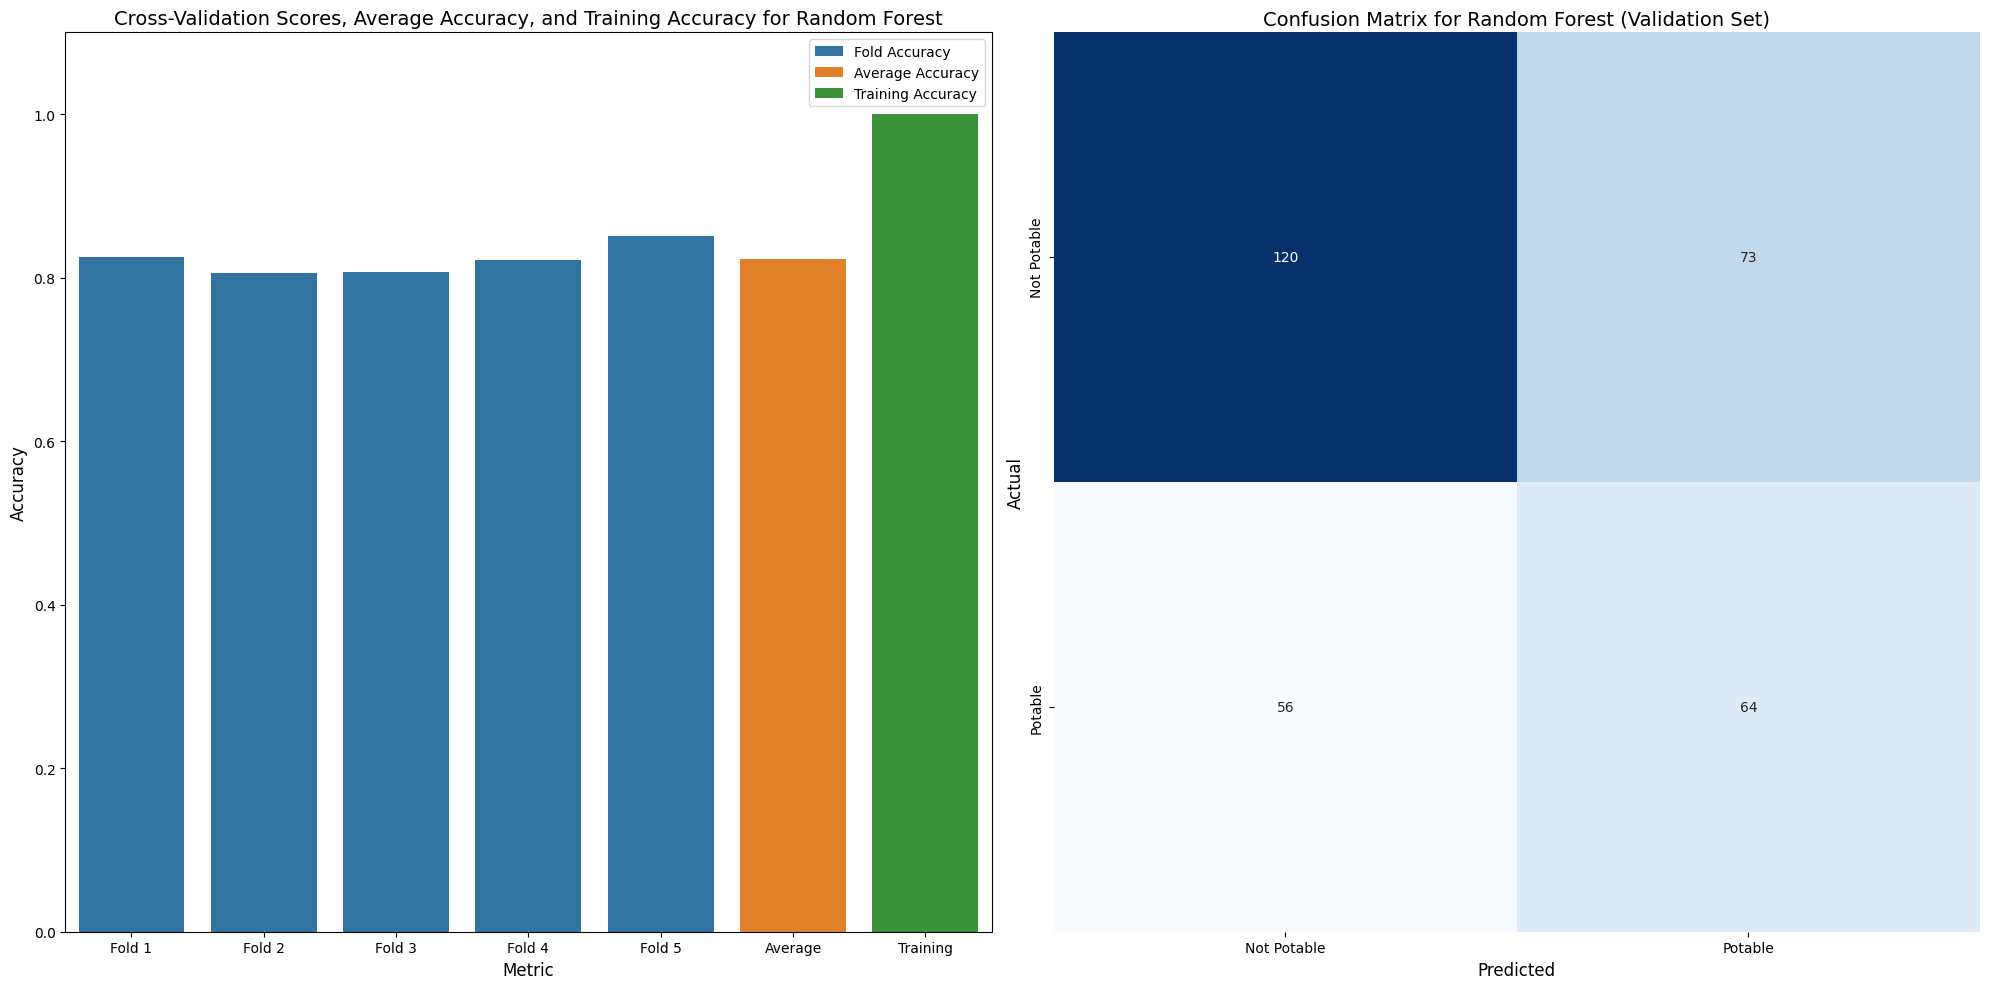

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot cross-validation scores, average accuracy, and training accuracy
sns.barplot(x=[f"Fold {i+1}" for i in range(5)], y=cv_scores, color='C0', label='Fold Accuracy', ax=ax1)
sns.barplot(x=["Average"], y=[cv_scores.mean()], color='C1', label='Average Accuracy', ax=ax1)
sns.barplot(x=["Training"], y=[train_accuracy], color='C2', label='Training Accuracy', ax=ax1)

ax1.set_title("Cross-Validation Scores, Average Accuracy, and Training Accuracy for Random Forest", fontsize=14)
ax1.set_xlabel("Metric", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper right')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'], ax=ax2)
ax2.set_title("Confusion Matrix for Random Forest (Validation Set)", fontsize=14)
ax2.set_xlabel("Predicted", fontsize=12)
ax2.set_ylabel("Actual", fontsize=12)

plt.tight_layout()
plt.show()

## XGBoost

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

xgb = XGBClassifier(random_state=42)

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_scores = []

# Perform manual cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model on the training fold
    xgb.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation fold
    y_val_pred = xgb.predict(X_val_fold)
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    cv_scores.append(fold_accuracy)

cv_scores = np.array(cv_scores)

xgb.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = xgb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)

# Evaluate the model on the validation set
y_val_pred = xgb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Print results
print("Cross-validation scores for XGBoost:", cv_scores)
print("Mean cross-validation accuracy for XGBoost is:", cv_scores.mean())
print("\nTraining Set Accuracy:", train_accuracy)
print("\nClassification Report for XGBoost on Training Set:")
print(train_classification_rep)
print("\nValidation Set Accuracy:", val_accuracy)
print("\nClassification Report for XGBoost on Validation Set:")
print(val_classification_rep)

Cross-validation scores for XGBoost: [0.79773463 0.80097087 0.7815534  0.82820097 0.80551053]
Mean cross-validation accuracy for XGBoost: 0.8027940813939459

Training Set Accuracy: 1.0

Classification Report for XGBoost on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1544
           1       1.00      1.00      1.00      1544

    accuracy                           1.00      3088
   macro avg       1.00      1.00      1.00      3088
weighted avg       1.00      1.00      1.00      3088


Validation Set Accuracy: 0.7699680511182109

Classification Report for XGBoost on Validation Set:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       193
           1       0.71      0.68      0.69       120

    accuracy                           0.77       313
   macro avg       0.76      0.75      0.75       313
weighted avg       0.77      0.77      0.77       313



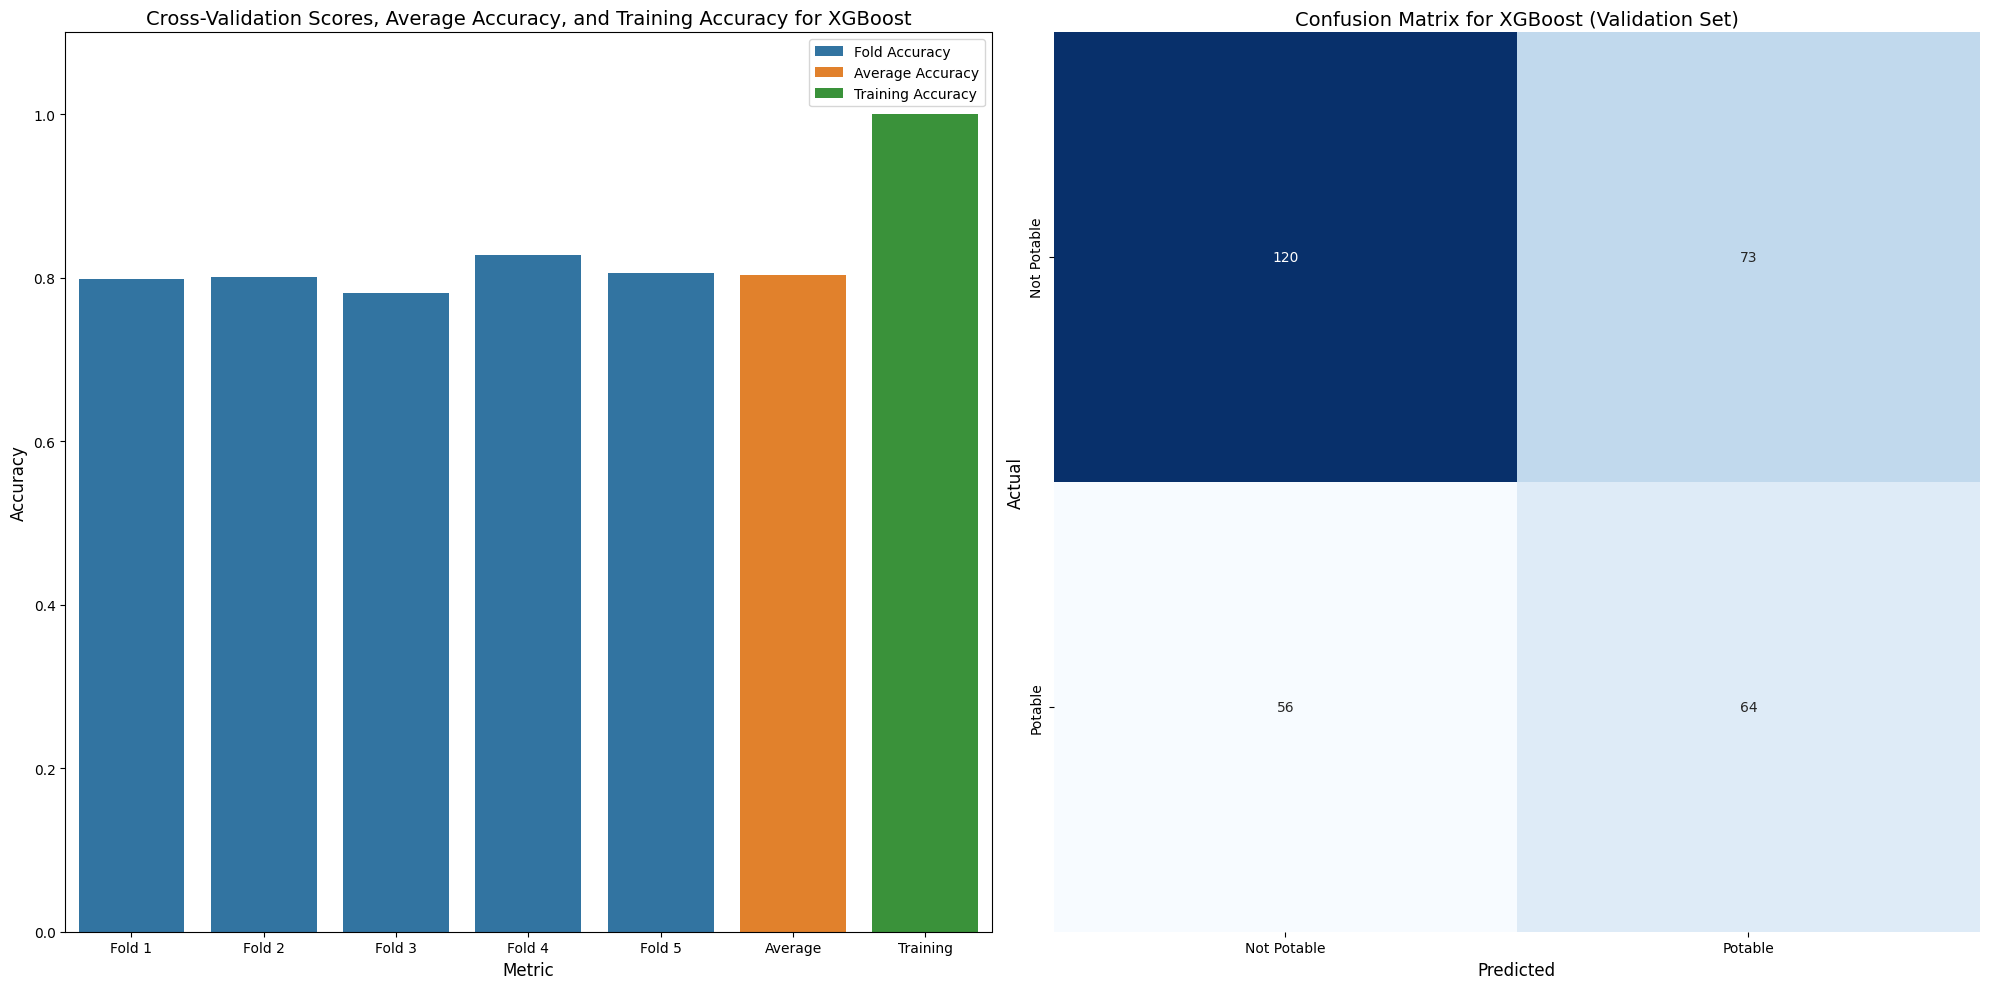

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot cross-validation scores, average accuracy, and training accuracy
sns.barplot(x=[f"Fold {i+1}" for i in range(5)], y=cv_scores, color='C0', label='Fold Accuracy', ax=ax1)
sns.barplot(x=["Average"], y=[cv_scores.mean()], color='C1', label='Average Accuracy', ax=ax1)
sns.barplot(x=["Training"], y=[train_accuracy], color='C2', label='Training Accuracy', ax=ax1)

ax1.set_title("Cross-Validation Scores, Average Accuracy, and Training Accuracy for XGBoost", fontsize=14)
ax1.set_xlabel("Metric", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper right')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'], ax=ax2)
ax2.set_title("Confusion Matrix for XGBoost (Validation Set)", fontsize=14)
ax2.set_xlabel("Predicted", fontsize=12)
ax2.set_ylabel("Actual", fontsize=12)

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

We observed that Random Forest and XGBoost achieved the best performance among all the models tested. However, both models exhibited signs of overfitting, as indicated by their 100% training accuracy and significantly lower validation accuracy. We will work more on these models and choose the best one.